# Business Case - Predicting Whether The Client Subscribed The Term Deposit Or Not                                                                   

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [133]:
data=pd.read_csv("bank-additional.csv",sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [ ]:
## Observation: Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label.
# so we need to reassign na values to it.

In [135]:
data=pd.read_csv("bank-additional.csv",sep=';',na_values=['unknown'])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


# Domain Analysis

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# Bank client data:
   1 - age: specifies the age of the client (numeric)
   
   2 - job: indicates the type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-   employed","services","student","technician","unemployed")  
   
   3 - marital: mentions the marital status of the client (categorical: "divorced","married","single", note: "divorced" means divorced or widowed)
  
   4 - education: indicates whether the client is educationally qualified or not
  categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree")
   
   5 - default: indicates whether the client has credit in default? (categorical: "no","yes")
   
   6 - housing: indicates whether the client has availed housing loan? (categorical: "no","yes")
   
   7 - loan: indicates whether the client has personal loan? (categorical: "no","yes")
  
   # Related with the last contact of the current campaign:
   
   8 - contact: contact communication type given by the client (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target    (e.g., if duration=0 then y="no"). 
   Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included  for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
 # Other attributes:
 
  12 - campaign: indicates the number of contacts made by the bank for a specific client during this campaign (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means   client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign for a specific client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
  # Social and Economic context attributes
  
  16 - emp.var.rate: It denotes Employment Variation Rate - a quarterly indicator (numerical). It could be referring to cyclical employment variation. Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy.
          
  17 - cons.price.idx: It denotes Consumer Price Index - a monthly indicator (numeric). The Consumer Price Index measures the average change in prices over time that consumers pay for a basket of goods and services.    
  
  18 - cons.conf.idx: It denotes Consumer Confidence Index (CCI) - a monthly indicator (numeric). This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.    
  
  19 - euribor3m: It denotes euribor 3 month rate - a daily indicator (numeric). Euribor is an overnight interbank rate comprised of the average interest rates from a panel of large European banks that are used for lending  to one another in euros. Euribor has various maturities in which each maturity has its own interest rate.
  
  20 - nr.employed: It denotes the number of employees - a quarterly indicator (numeric). This feature details the number of employees in the bank, has a positive effect for turning people to subscribe the term deposit.
              
  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


# Basic Checks

In [137]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [138]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [139]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [141]:
data.isnull().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [142]:
# Observation: Some missing values are present which requires treatment in the preprocessing part

# Exploratory Data Analysis [EDA]


### Univariate Analysis-- Analyzing Single Variable 

In [143]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

In [144]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Insights

$ AGE $
- It's a numerical feature.About 90% of data lies between the age group of 25-60. Here avg age is 40.1 years & median age is     38. Here skewness is 0.716 & kurtosis is 0.438. It lies within the permissible range so it is normally distributed.

$ JOB $
- Its a categorical feature having 11 distict labels like "admin","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician"      "unemployed". Out of which 70% of data belongs to 4 categories only ie admin, bluecollar, technician, services.

$ MARITAL$
- Marital status is a categorical feature having 3 distinct features "married","divorced","single". 61% are married, 28% are single, 11% are divorced.

$ EDUCATION $
- It's a categorical feature having 7 distinct features like "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree". 32% of data belongs to the university.degree class, 23% belongs to highschool class, 15% are basic.9y, 14% did professional course and 11% belongs to basic.4y.

$ DEFAULT$
- Credit default means a debt default happens when a borrower fails to pay his or her loan at the time it is due. More than 99% of data shows no credit default.

$ HOUSING$
- Its a categorical feature shows whether the person has availed a housing loan or not. It has 2 distict labels i.e yes,no. 54% participants have availed a housing loan whereas 46% did not avail a housing loan.

$ LOAN $
- Its a catagorical feature detailing whether the client has availed a personal loan or not. It has 2 distinct labels yes,no. 83% have no personal loan and the rest 17% have a personal loan.

$ CONTACT $
- It shows contact communication type. 64% shows cellular contact type whereas 36% contacted through telephone.

$ MONTH $
- Shows last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec"). 78% of the contacts were made during the month from May to August.

$ DAY. OF.  WEEK $
- It's a catagorical feature that shows the last contact day of the week from monday to friday. Almost equal no of contacts were made in these days.

$ DURATION $
- It shows last contact duration in seconds.It's a numerical feature. About 80% calls have call duration of less than 500 seconds. 95% of calls have duration less than 740 seconds. It has kurtosis 20.8 & skewness 3.29 which clearly explains high positive skewness and kurtosis.

$ CAMPAIGN $
- Its a numerical feature showing the number of contacts performed during this campaign for a client. 81.3% clients are contacted less than 3 times. The kutosis is 25.3 and skewness is 4 clearly showing the distribution is not normal.

$ PDAYS $
- Its a numerical feature detailing the number of days that passed by after the client was last contacted from a previous campaign. 96.1%  times the client was not previously contacted. The kurtosis is 20.8 and skewness is -4.78 showing data distribution is not normal.

$ PREVIOUS $
-  It means number of contacts performed before this campaign for a specific client. It's a catagorical feature which shows 86% of the clients were not contacted before this campaign.

$ POUTCOMES $
- It shows outcome of previous marketing campaign. Its a categorical feature set having 3 unique labels    like"failure","nonexistent","success". 86% of the outcomes are "nonexistent". 11% shows failure outcome and 3% shows successful outcome.

$ EMP.VAR.RATE $ 
- employment variation rate -it could be referring to cyclical employment variation. Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy.In this case it is a quarterly indicator & numerical feature.39% belongs to category 1.4, 21% belongs to -1.8 and 18%  belongs to 1.1.

$CONS.PRICE.INDEX$
 - consumer price index - The Consumer Price Index measures the average change in prices over time that consumers pay for a basket of goods and services. It's a numerical feature. Here almost all the values lies between 92-95.

$ CONS.CONF.IDX$ 
- consumer confidence index - numeric feature having all values negative. Average of the feature is -40.5 and median  -41.8. kurtosis of the feature is -0.314 & skewness 0.287.

$ EURIBOR3M $
- Generally it shows the interest rates. 95% of the dataset lie within the range of 5%. It's a numerical feature having kurtosis -1.40 and skewness -0.715.

$ NR.EMPLOYED $
- It is the number of people working in the bank. 90% times it lies within the range of 5.1k to 5.2k. It's a numerical feature.

$ y $
- It is our target variable that shows if the client subscribed a term deposit or not. It's a categorical feature having binary labels - "yes" or "no". It shows 89% of the clients have not subscibed the term deposit and the rest 11% had subscribed the term deposit.


## Bivariate Analysis

In [145]:
data.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx',
                    'nr.employed':'nr_employed'},inplace=True) 

In [146]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [147]:


#data1 - d1
d1=data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed',
         'y']]

In [148]:
d1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [149]:
#sns.pairplot(data=d1, hue='y')
#plt.show() # pair plot wont give better result to draw insights.trying other options.

In [150]:
# separting numerical and categorical features for better results

In [151]:
d1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [152]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [153]:
#numerical variables
d2=d1[['age','duration', 'campaign', 'pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed']]
       

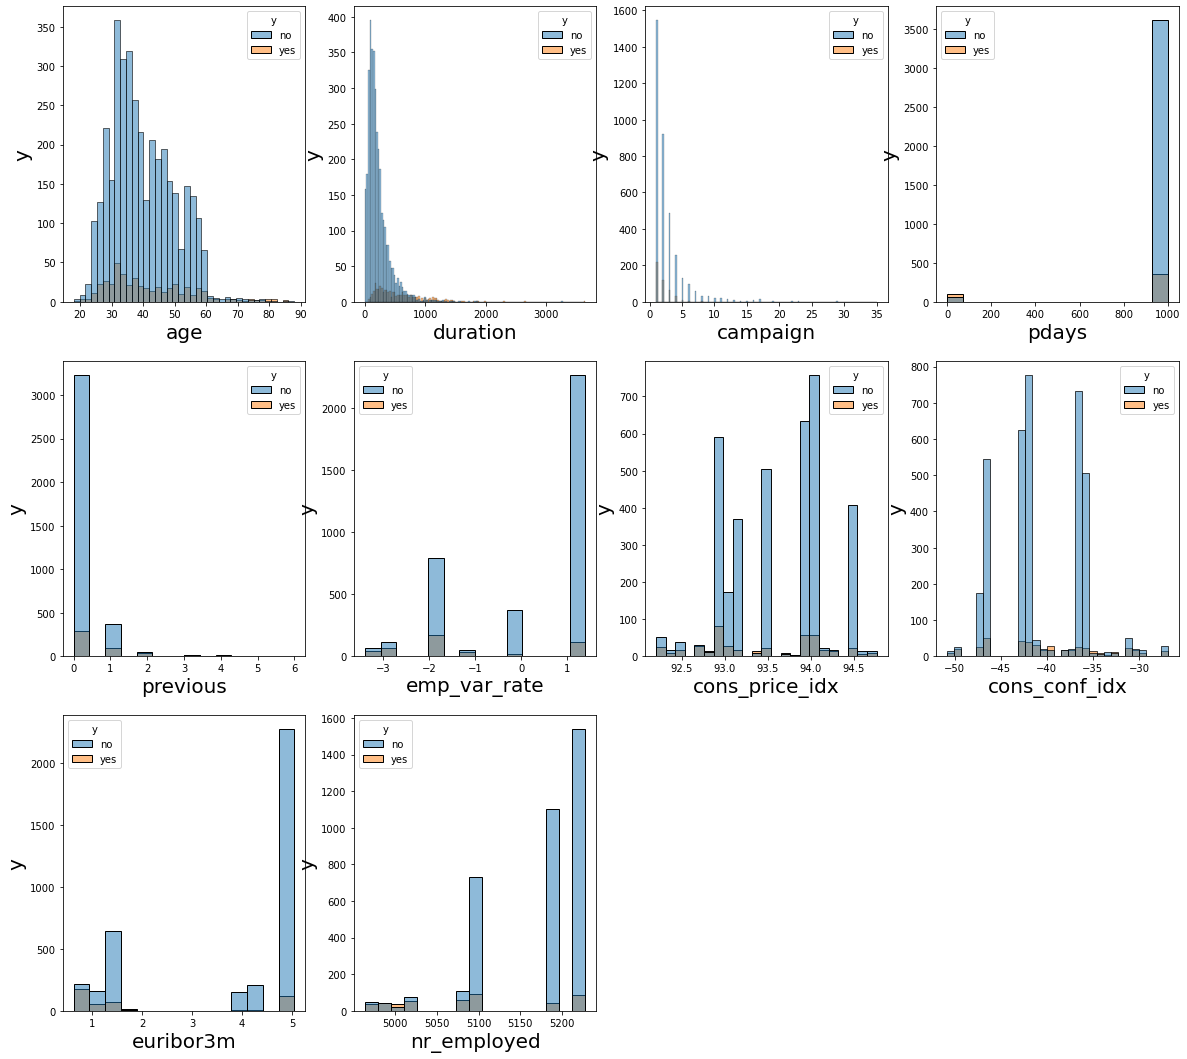

In [154]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in d2:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=d2[column].dropna(axis=0),hue=data.y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:

# Since with scatterplot visualization, we cannot draw any insights, we delete this code. and we try with other visualizations ,
#hence commented for now.
#plt.figure(figsize=(15,20), facecolor='white')
#plotnumber = 1
#for column in d1:
#    if plotnumber<=16 :
#        ax = plt.subplot(4,4,plotnumber)
#        sns.scatterplot(x=d1[column].dropna(axis=0)
#                        ,y=data.y)
#        plt.xlabel(column,fontsize=20)
#        plt.ylabel('y',fontsize=20)
#    plotnumber+=1
#plt.tight_layout()

 difficult to draw insights from hist plot and scatter plot so searching for other alternative

### Separating The Categorical Features and Numerical Features And Applying Different Plots.

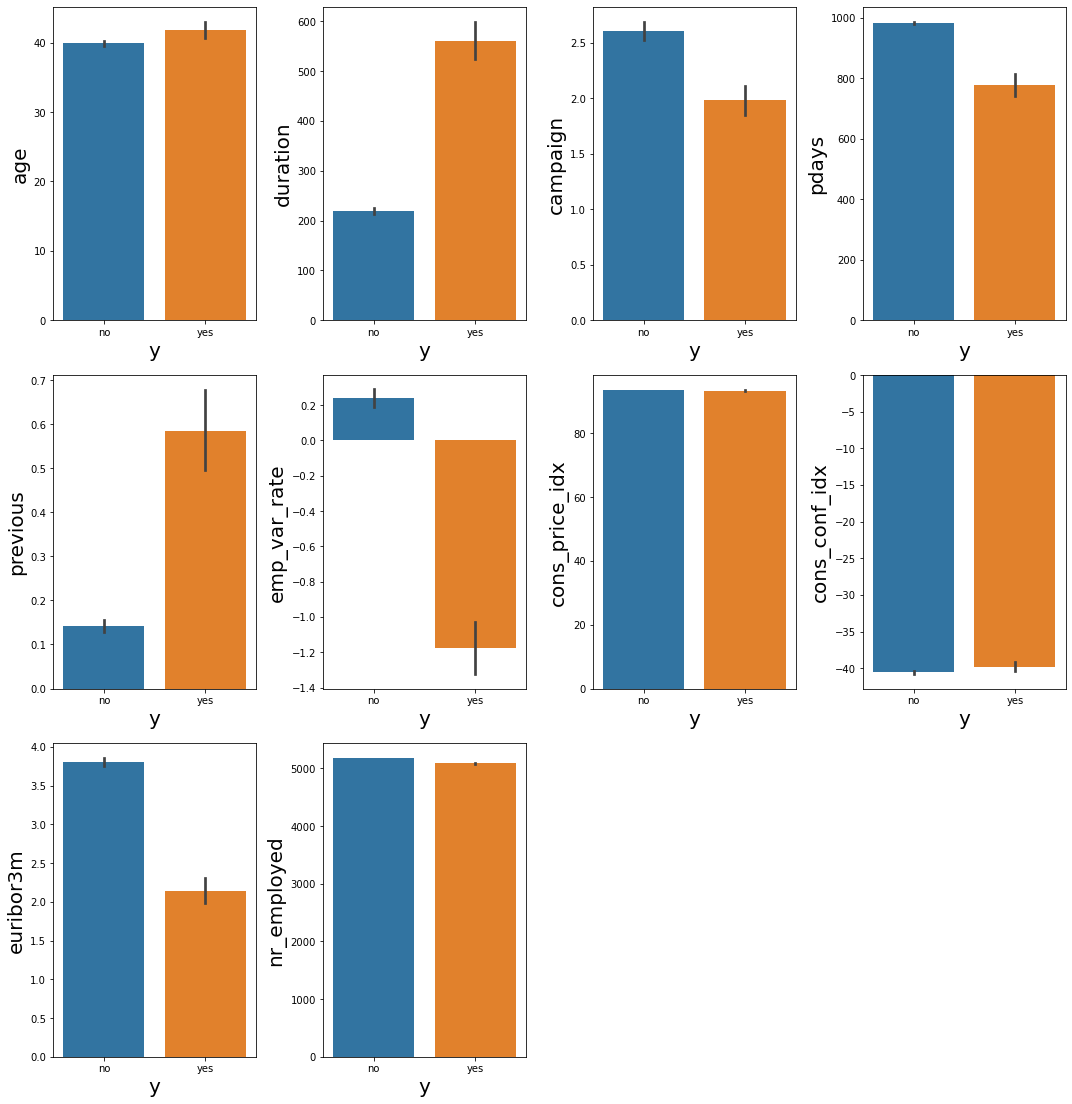

In [156]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in d2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.barplot(x=data.y,y=d2[column].dropna(axis=0))    
        plt.ylabel(column,fontsize=20)
        plt.xlabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [157]:
d3=d1[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']]

<AxesSubplot:xlabel='job', ylabel='count'>

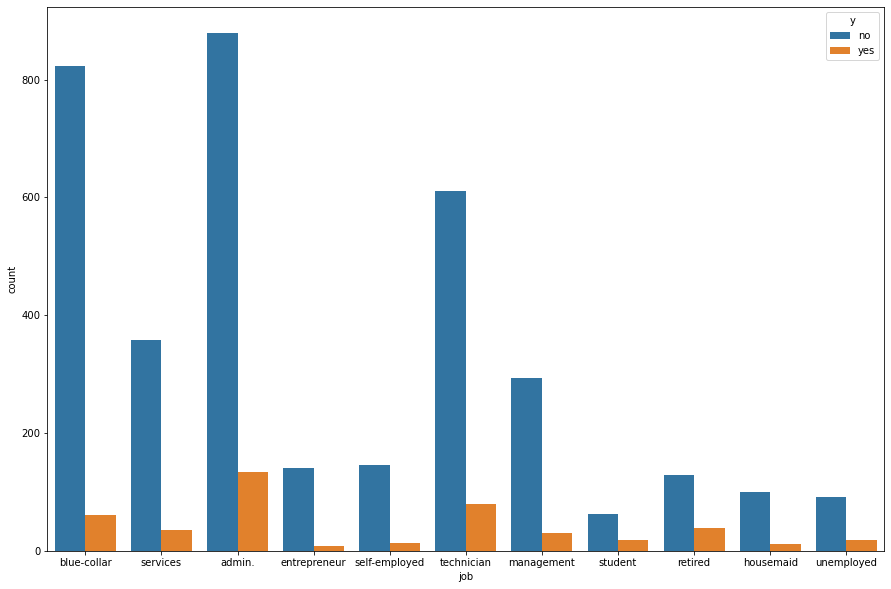

In [158]:
plt.figure(figsize=(15,10))
sns.countplot(x='job',data=data,hue='y')

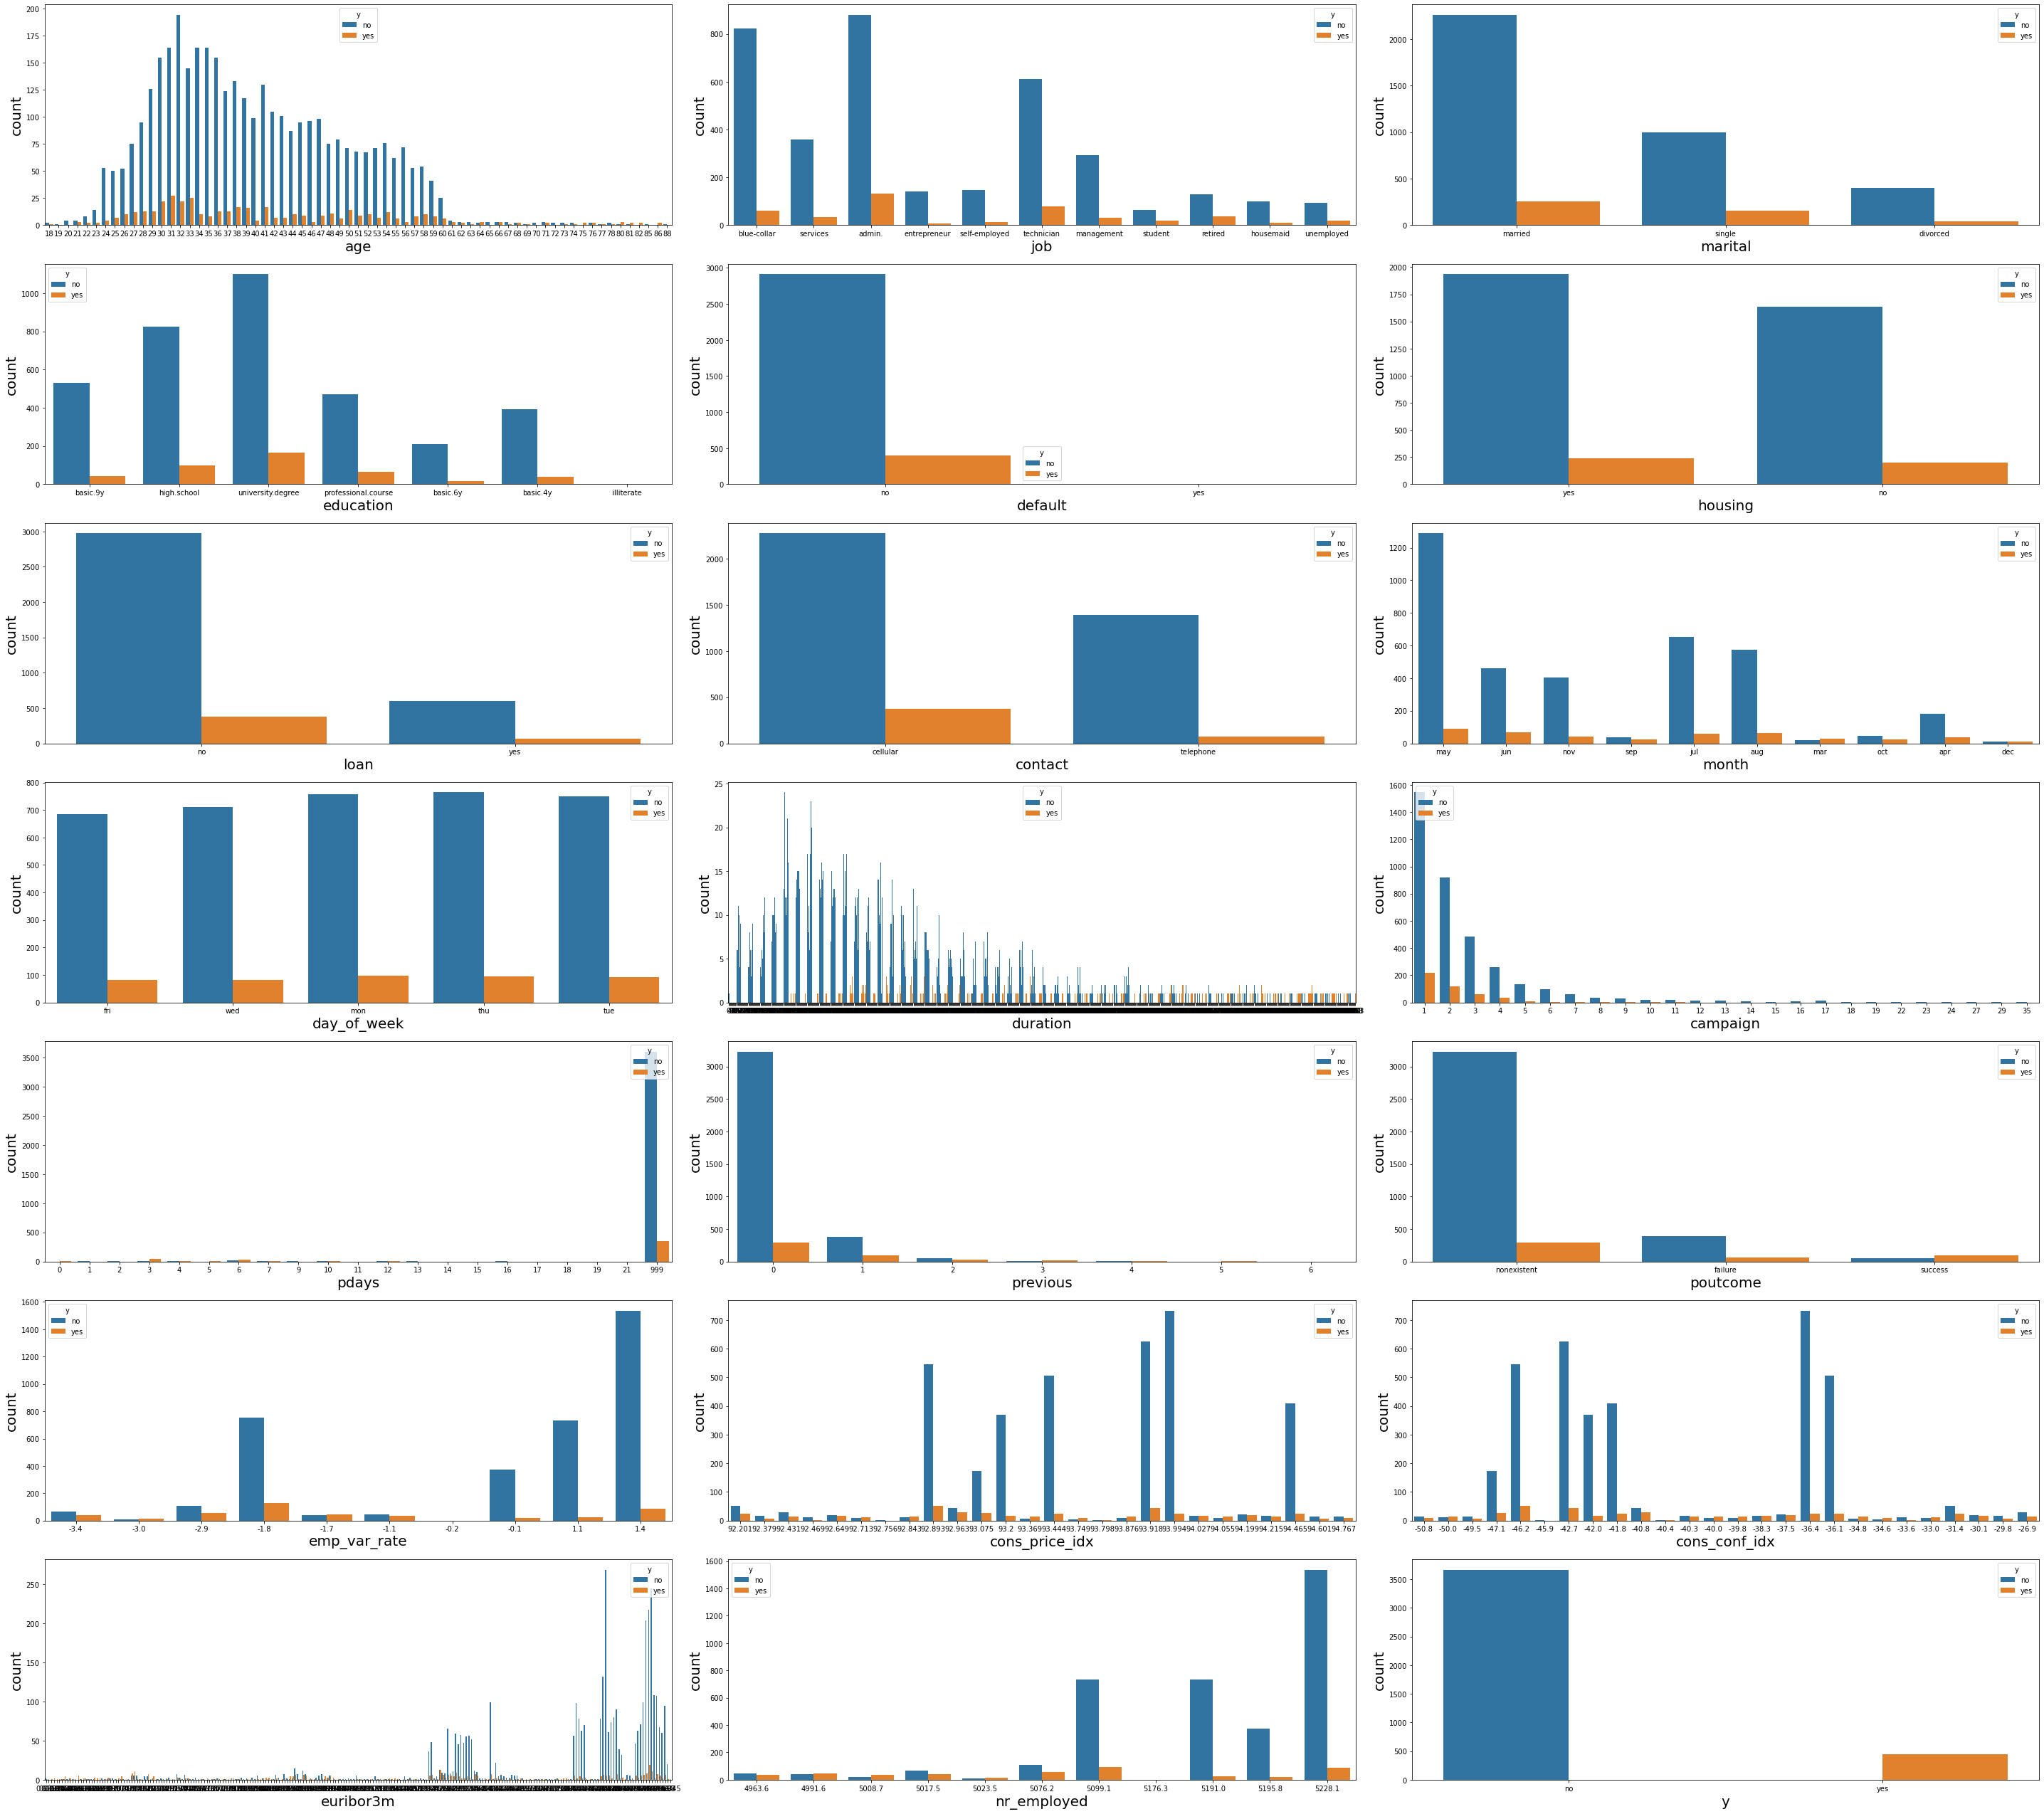

In [159]:
plt.figure(figsize=(40,40), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=24 :
        ax = plt.subplot(8,3,plotnumber)
        sns.countplot(x=d1[column].dropna(axis=0)
                        ,data=data,hue='y')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='cons_price_idx', ylabel='count'>

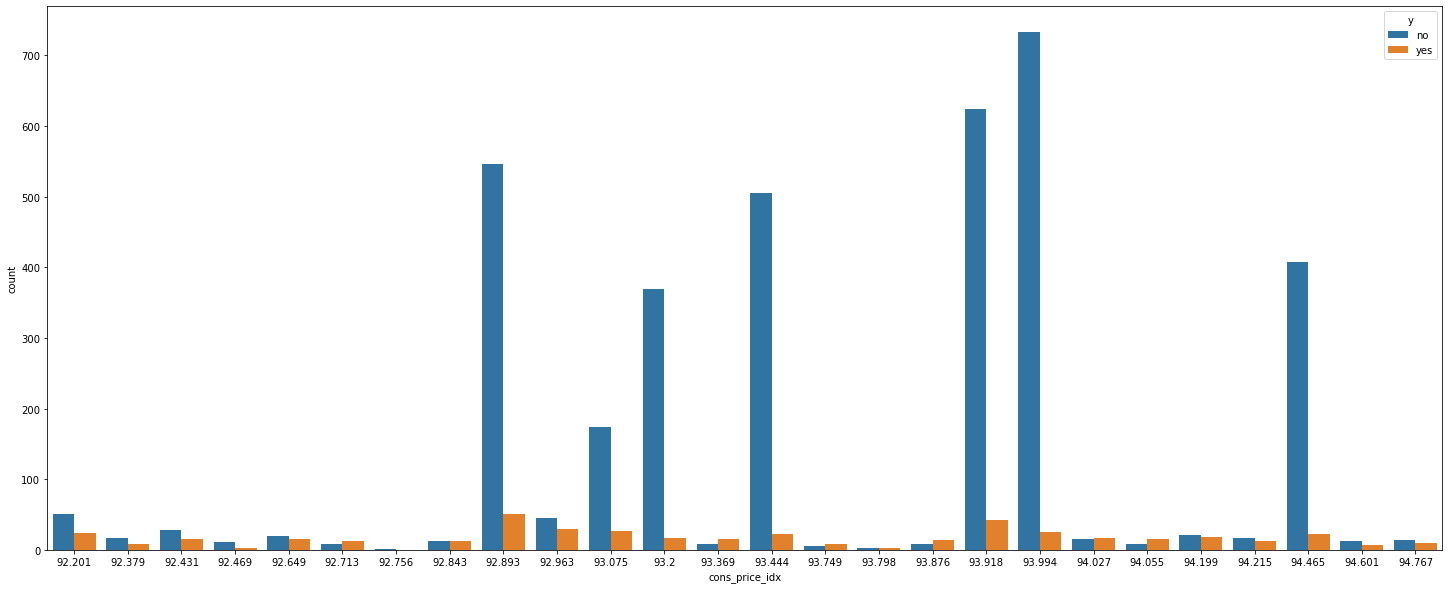

In [162]:
plt.figure(figsize=(25,10))
sns.countplot(x='cons_price_idx',data=data,hue='y')

In [163]:
d1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

## Insights

* AGE - The working population belonging to the age group 24-59 were not much interested about the subscription of the term deposit. Chances for subscription for this age group is only 5-10% whereas for age group 60-88, chances for subscription of fixed deposit is almost 50%. It clearly shows that old age people prefer to go for fixed deposit.


* JOB - Out of various kinds of jobs chances of students,retired,unemployed,housemaid persons for subscription is high as compared to other categories. From the above graph admin,blue-collar,technician persons are high in numbers but chances for fixed deposite subscription is quite low. 


* MARITAL- Out of 2400 married persons, only 10% (about 250 clients) subscribed the term deposit. Out of 1200 single persons, about 200 i.e 17% subscribed the term deposit. Out of 500 (about 50 clients) i.e 10% subscribed the term deposite. So chances of a single person subscribing the term deposite is more as compared to the other class.


* EDUCATION- Out of various education classes about (10%) of basic.9y, (12.5%) of highschool, (16%) of university degree, (12%) of professional course prefer to go for fixed deposit which apparently shows the chances of educated people going for the subscription of the fixed deposit is more compared to other classes of education.


* DEFAULT- Those people who have credit in default were not going for fixed deposit subscription. Out of 3200 people who had no credit in default about 400 opted fixed deposit.


* HOUSING- This housing loan wont much affect our target value as for both the cases of having a housing loan or not. The sample behave equally for the term deposit subscription.


* LOAN- this personal loan also wont much affect our target variable. Whether a person has personal loan or not, both will show equal behaviour.


* CONTACT- cellular type contact seems to be more effective than telephone type contact method because cellular type contact was used almost twice than that of telephone type communication type.


* MONTH- In the month of March, more people subscribed the term deposit in comparison to the people who are not interested. In the month of December chances were 50-50%. If we arrange the subscription based on the no of times contacted and subsription then it follows the order like March,Dec,Sep,Oct,April,June,Nov,Aug,Jul,May. Communication made by the bank in the months of May,June,July,Aug was found to be maximum but the response provided by the customers for the term deposit was not that good as compared to the other months.


* day_of_week- Maximum last contact was made on Monday, Tuesday and Thursday. On all days, the percentage of chances of subscription are almost equal.


* DURATION- when the duration of the call was less, chances of subscription was also less. When duration of the call was more it shows the person was interseted to talk chances of subscription was more in this case.


* CAMPAIGN-  17500 clients contacted once and out of them 200 subscribed the term deposit rest 1550 was not interested. Similarly 1150,600,300 clients had contacted 2,3,4 times respectively. Out of them 150,100,60 clients had subscribed the term deposit.


* PDAYS- If the number of days that passed by after the client was last contacted from a previous campaign was 3-12 days chances of subscription was more. Out of 4000 new clients, who was not contacted previously about 400 ie 10% subscribed the term deposit.


* PREVIOUS- number of contacts performed before this campaign is almost 0 for about 3700 clients. Out of which only 400 subscribed the deposit which shows it's really difficult to convince the client for subscription in a single call. If the no of contacts before this campaign is twice, there are 30% chances of subscription. If the clients were contacted more than 3 times, chances for subscription was more than 70%.


* POUTCOME- Out of 3500 "nonexistent" client category, 400 subscribed  the term deposit, Out of 500 "failure" client category 50 subscribed  the term deposit. Out of 300 "success" client category, 200 subscribed  the term deposite.


* EMP_VAR_RATE- when this values is negative(less than -1.1), chances of subcription of loan was more.(like -1.1,-1.7,-3.0,-3.4).


* CONS_PRICE_IDX-this values shows different behaviour like in the range of (92.2-92.713),(94.027-94.215),(93.75) chances of subscription was more in comparison to other ranges.


* CONS-CONF-IDX-this values shows different behaviour like in the range of (-50.8 TO -49.5),(-40.3 to -37.5),(-34.8 to -26.9) chances of subscription was more in comparision to other ranges.here almost all values lies in the negative range.


* EURIBOR3m - visualization was difficult.


* NR.EMPLOYED - it shows number of people working in the bank.When this values lies in the range of 4960-5025, it shows positive effect for subscription of fixed deposit but it covers less observations or clients. When this number incresed to 5230 it covers more clients from 5025-5230 but percentage of clients subscription was found to be minimal.

# Data Preprocessing

## Missing Value Treatment

In [164]:
# Checking for missing values 
data.isnull().sum()

# As seen missing values are present in some features. So, imputation treatment is required

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_idx      0
cons_conf_idx       0
euribor3m           0
nr_employed         0
y                   0
dtype: int64

## Creating data1 

In [166]:
data1=data

In [167]:
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [168]:
data1.isnull().sum()

# Missing values has been removed using fillna method.

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_idx      0
cons_conf_idx       0
euribor3m           0
nr_employed         0
y                   0
dtype: int64

In [169]:
data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [170]:
data1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                  object
dtype: object

In [171]:
data1.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', nan, 'illiterate'],
      dtype=object)

In [172]:
data1['education'] = data1['education'].fillna(data1['education'].mode()[0])

In [173]:
data1.education.unique() # check guys after applying mode no nan return.

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'illiterate'],
      dtype=object)

## Applying Mode To Treat All Missing Values in Categorical Features Having nan Values.

In [174]:
data1.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', nan], dtype=object)

In [175]:
data1['job'] = data1['job'].fillna(data1['job'].mode()[0])

In [176]:
data1.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed'], dtype=object)

In [177]:
data1.marital.unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [178]:
data1['marital'] = data1['marital'].fillna(data1['marital'].mode()[0])

In [179]:
data1.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [180]:
data1.default.unique()

array(['no', nan, 'yes'], dtype=object)

In [181]:
data1['default'] = data1['default'].fillna(data1['default'].mode()[0])

In [182]:
data1.default.unique()

array(['no', 'yes'], dtype=object)

In [183]:
data1.housing.unique()

array(['yes', 'no', nan], dtype=object)

In [184]:
data1['housing'] = data1['housing'].fillna(data1['housing'].mode()[0])

In [185]:
data1.housing.unique()

array(['yes', 'no'], dtype=object)

In [186]:
data1.loan.unique()

array(['no', nan, 'yes'], dtype=object)

In [187]:
data1['loan'] = data1['loan'].fillna(data1['loan'].mode()[0])

In [188]:
data1.loan.unique()

array(['no', 'yes'], dtype=object)

In [189]:
data1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

## Outlier Treatments

### Outlier Treatment for Numerical Features

In [190]:
# now checking outlier for numerical features.

In [191]:
data1.shape

(4119, 21)

In [192]:
data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [193]:
## new_df1 contains numerical features
# creating new data frame new_df1
new_df1 = data1[['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]
new_df1

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1


In [194]:
import warnings
warnings.filterwarnings('ignore')

### Using distribution plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

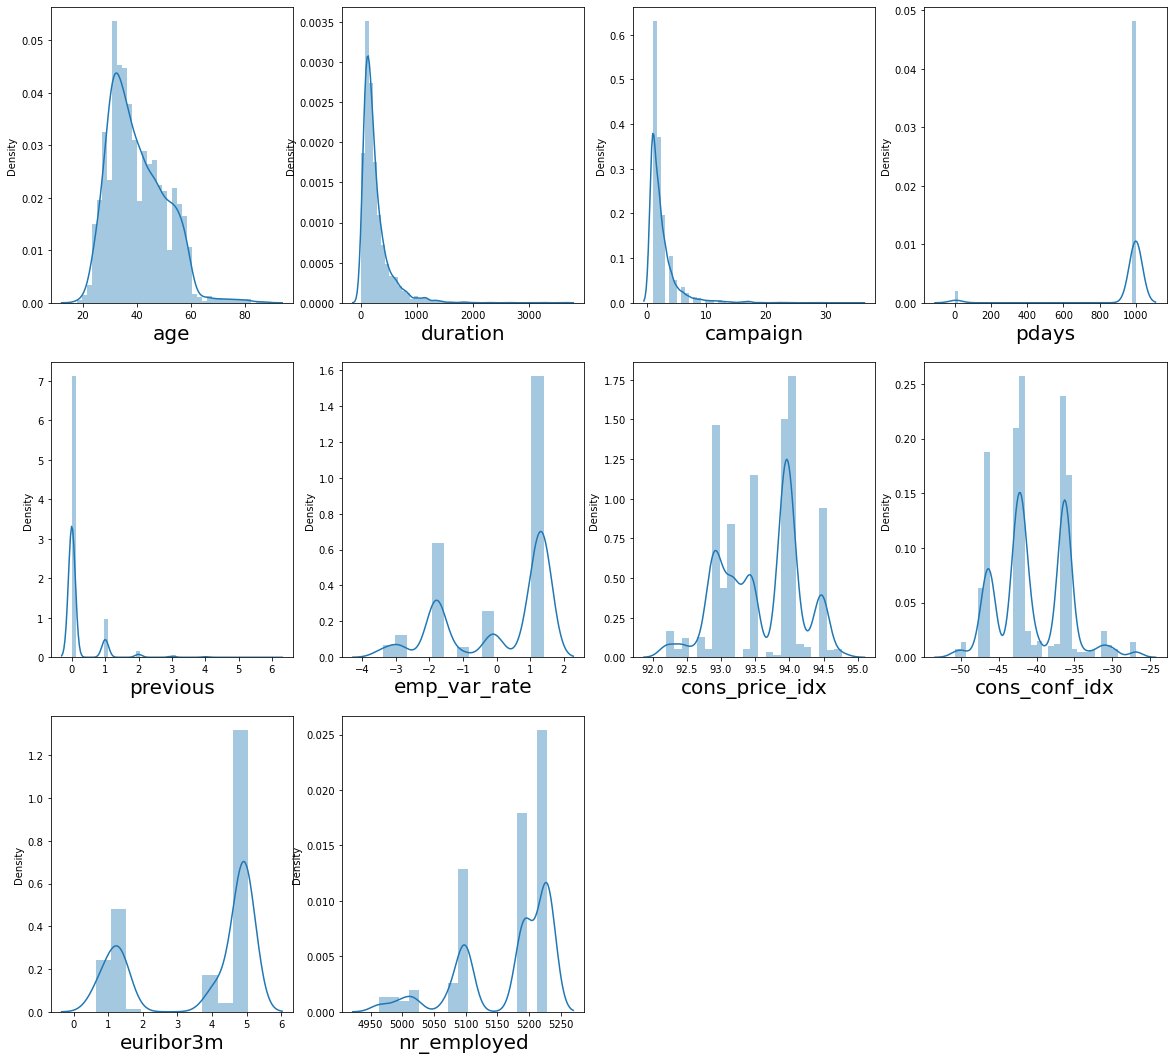

In [195]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(new_df1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#Observation:
# outliers are present.Needs treatment for outliers

## Visualizing Outliers Using Boxplots

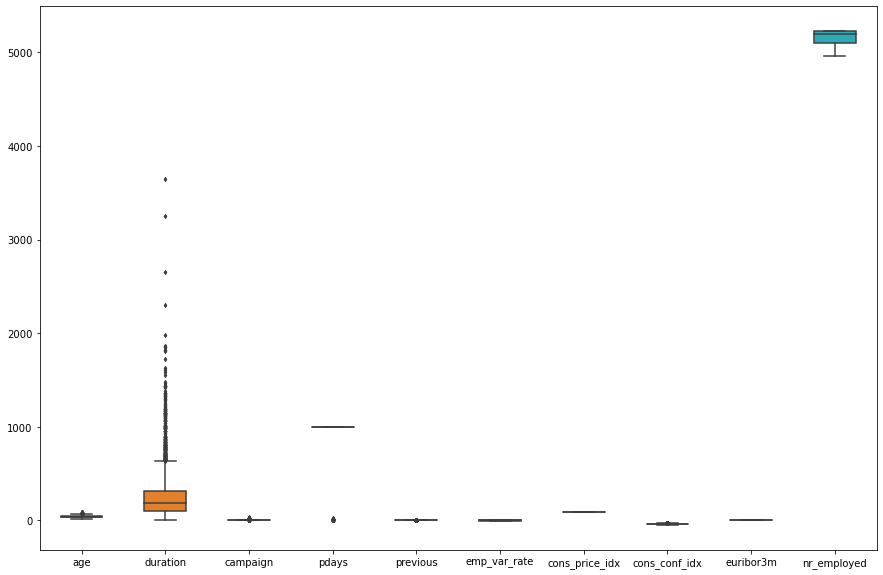

In [196]:
## checking the outliers for numeric features using boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_df1, width= 0.5,ax=ax,  fliersize=3)
plt.show()

#Observation: Needs outlier treatment # here visualization is difficult, so trying other way of plotting outliers.

In [197]:
new_df1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

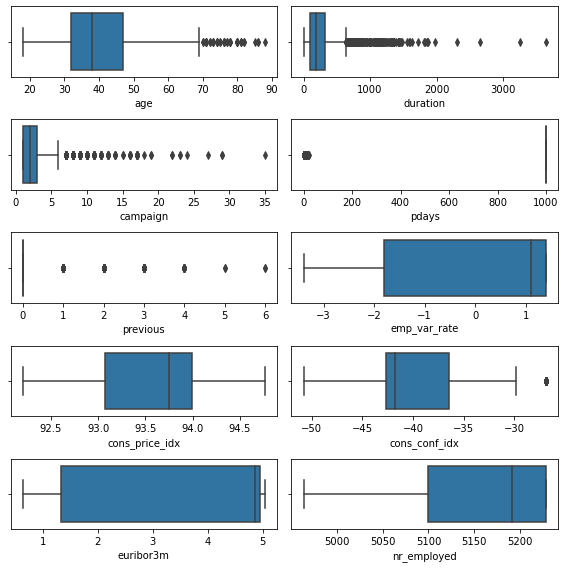

In [198]:

%matplotlib inline
plt.figure(figsize=(8,8), tight_layout=True)  
plotnumber=1
for column in new_df1:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber) 
        #plt.xlabel(column,fontsize = 5)   
        sns.boxplot(x=new_df1[column])
        plotnumber+=1




# Removing Outliers

In [199]:
# now separating features individually and removing outliers.

## Our Final Dataframe Will Be data1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

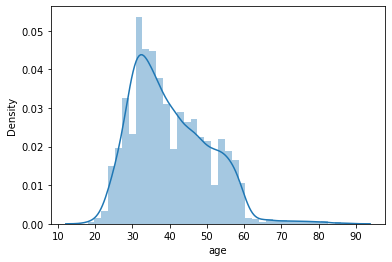

In [200]:
sns.distplot(data1.age)
# Data is not normally distributed. So, outlier treatment is necessary

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

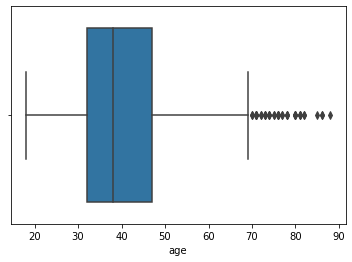

In [201]:
sns.boxplot(data1.age)

#Outlier treatment required 

### Removing Outlier For "age" Feature Using IQR

In [202]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['age'], interpolation = 'midpoint') 

IQR

15.0

In [203]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['age'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['age'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [204]:
min_limit

9.5

In [205]:
#filtering the data
data1.loc[data1['age']<min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [206]:
max_limit

69.5

In [207]:
data1.loc[data1['age']>max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
42,76,retired,married,university.degree,no,no,no,cellular,aug,thu,...,1,999,1,failure,-1.7,94.027,-38.3,0.899,4991.6,no
128,75,retired,married,basic.4y,no,no,no,cellular,apr,tue,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,yes
150,82,housemaid,married,basic.4y,no,no,no,telephone,sep,tue,...,3,3,2,success,-1.1,94.199,-37.5,0.877,4963.6,yes
167,71,blue-collar,divorced,basic.4y,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,no
228,76,retired,single,basic.4y,no,no,no,cellular,nov,mon,...,4,6,1,success,-3.4,92.649,-30.1,0.715,5017.5,yes
338,81,retired,married,basic.4y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
450,73,retired,married,university.degree,no,yes,no,cellular,mar,fri,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.531,5099.1,yes
537,74,retired,married,university.degree,no,no,no,telephone,oct,mon,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.977,4963.6,no
589,77,management,married,university.degree,no,yes,no,cellular,aug,fri,...,1,3,6,success,-1.7,94.027,-38.3,0.905,4991.6,yes
696,86,retired,married,university.degree,no,yes,yes,cellular,sep,tue,...,1,7,4,success,-1.1,94.199,-37.5,0.877,4963.6,yes


In [208]:
## imputing the outliers as the count is high
data1.loc[data1['age'] > max_limit,'age']=np.median(data1['age'])

In [209]:
data1['age'].describe()

count    4119.000000
mean       39.746540
std         9.660751
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        69.000000
Name: age, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

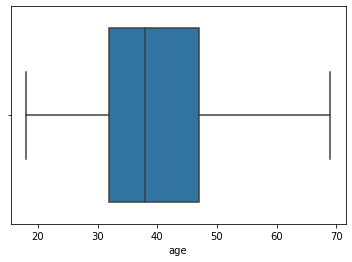

In [210]:
# Checking for outliers again using boxplot

sns.boxplot(data1.age)
#Insight: Outlier has been removed for the "age" feature

### Checking Outlier For The Feature "duration"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

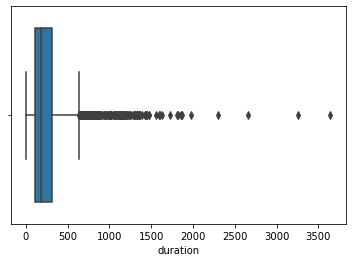

In [211]:
sns.boxplot(data1['duration'])

# No outlier found for this feature

### Removing Outlier For "duration" Feature Using IQR

In [212]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['duration'], interpolation = 'midpoint') 

IQR

214.0

In [213]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['duration'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['duration'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [214]:
min_limit

-218.0

In [215]:
#filtering the data
data1.loc[data1['duration']<min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [216]:
max_limit

638.0

In [217]:
data1.loc[data1['duration']>max_limit] # so no of rows containing  outliers more than 5% .so no treatment required.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
15,27.0,services,single,university.degree,no,no,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
19,50.0,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
68,32.0,blue-collar,married,basic.9y,no,no,no,cellular,nov,mon,...,2,5,1,success,-0.1,93.200,-42.0,4.191,5195.8,yes
74,31.0,technician,single,high.school,no,yes,yes,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,yes
80,54.0,technician,married,professional.course,no,yes,no,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,36.0,services,married,high.school,no,no,yes,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4069,60.0,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
4072,32.0,blue-collar,married,professional.course,no,yes,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no
4091,38.0,management,married,high.school,no,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


### Checking Outlier For The Feature "campaign"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

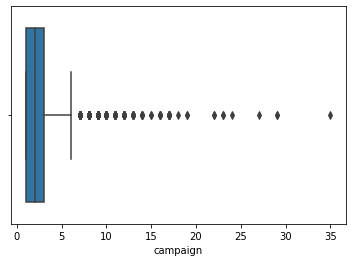

In [218]:
sns.boxplot(data1['campaign'])

# No outlier found for this feature

### Removing Outlier For "campaign" Feature Using IQR

In [219]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['campaign'], interpolation = 'midpoint') 

IQR

2.0

In [220]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['campaign'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['campaign'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [221]:
min_limit

-2.0

In [222]:
#filtering the data
data.loc[data['campaign']<min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [223]:
max_limit

6.0

In [224]:
data1.loc[data1['campaign']>max_limit]  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
24,44.0,technician,married,professional.course,no,yes,no,telephone,may,fri,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
34,48.0,technician,married,university.degree,no,no,no,cellular,aug,thu,...,7,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
56,29.0,admin.,single,university.degree,no,yes,no,telephone,jun,fri,...,27,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
79,32.0,technician,single,university.degree,no,no,no,cellular,aug,tue,...,12,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
82,59.0,services,married,basic.4y,no,no,no,cellular,aug,thu,...,7,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4025,44.0,admin.,married,high.school,no,no,no,cellular,aug,fri,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4062,31.0,unemployed,divorced,university.degree,no,yes,yes,cellular,jul,wed,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
4064,60.0,technician,married,university.degree,no,yes,no,cellular,aug,tue,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4084,30.0,unemployed,single,high.school,no,no,no,cellular,may,fri,...,11,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


### Checking Outlier For The Feature "pdays"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

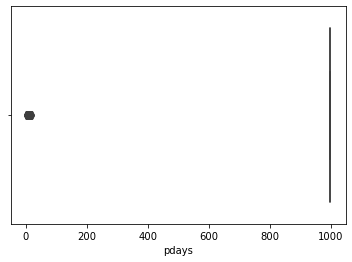

In [225]:
sns.boxplot(data1['pdays'])

# No outlier found for this feature

### Removing Outlier For "pdays" Feature Using IQR

In [226]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['pdays'], interpolation = 'midpoint') 

IQR

0.0

In [227]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['pdays'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['pdays'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [228]:
min_limit

999.0

In [229]:
#filtering the data
data1.loc[data1['pdays']<min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
21,39.0,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1,12,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
53,24.0,technician,married,university.degree,no,yes,yes,cellular,sep,tue,...,2,3,1,success,-3.4,92.379,-29.8,0.770,5017.5,yes
62,52.0,admin.,married,university.degree,no,yes,no,telephone,apr,wed,...,1,6,1,success,-1.8,93.749,-34.6,0.654,5008.7,yes
68,32.0,blue-collar,married,basic.9y,no,no,no,cellular,nov,mon,...,2,5,1,success,-0.1,93.200,-42.0,4.191,5195.8,yes
83,57.0,retired,married,university.degree,no,yes,no,cellular,apr,thu,...,1,2,1,success,-1.8,93.075,-47.1,1.365,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,43.0,admin.,married,university.degree,no,no,yes,cellular,aug,tue,...,3,13,1,success,-2.9,92.201,-31.4,0.838,5076.2,no
4014,36.0,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,2,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
4071,38.0,retired,married,basic.4y,no,no,no,cellular,oct,thu,...,1,14,3,failure,-1.1,94.601,-49.5,0.965,4963.6,no
4088,47.0,management,married,university.degree,no,yes,no,cellular,sep,mon,...,1,3,2,success,-3.4,92.379,-29.8,0.771,5017.5,yes


In [230]:
max_limit

999.0

In [231]:
data1.loc[data1['pdays']>max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


### Checking Outlier For The Feature "previous"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous'>

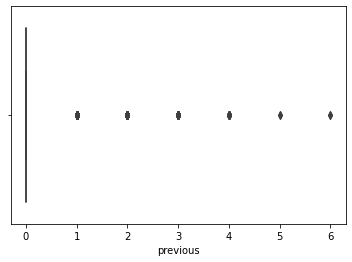

In [233]:
sns.boxplot(data1['previous'])

# No outlier found for this feature

### Removing Outlier For "previous" Feature Using IQR

In [234]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['previous'], interpolation = 'midpoint') 

IQR

0.0

In [235]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['previous'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['previous'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [236]:
min_limit

0.0

In [237]:
#filtering the data
data1.loc[data1['previous']<min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [238]:
max_limit

0.0

In [239]:
data1.loc[data1['previous']>max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
5,32.0,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
8,31.0,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
21,39.0,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1,12,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
27,28.0,blue-collar,married,basic.6y,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
30,38.0,technician,married,university.degree,no,yes,yes,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,47.0,management,married,university.degree,no,yes,no,cellular,sep,mon,...,1,3,2,success,-3.4,92.379,-29.8,0.771,5017.5,yes
4089,25.0,admin.,single,university.degree,no,yes,yes,cellular,oct,fri,...,1,999,1,failure,-3.4,92.431,-26.9,0.739,5017.5,yes
4094,62.0,blue-collar,married,basic.4y,no,yes,no,cellular,nov,mon,...,1,6,1,success,-3.4,92.649,-30.1,0.719,5017.5,no
4111,30.0,technician,married,university.degree,no,no,yes,cellular,jun,fri,...,1,999,1,failure,-1.7,94.055,-39.8,0.748,4991.6,no


In [240]:
# Observation: so no of rows containing  outliers more than 5% .so no treatment required.

### Checking Outlier For The Feature "emp_var_rate"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emp_var_rate', ylabel='Density'>

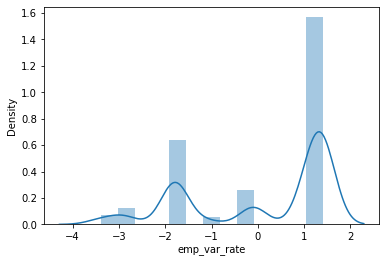

In [241]:
sns.distplot(data1['emp_var_rate'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_var_rate'>

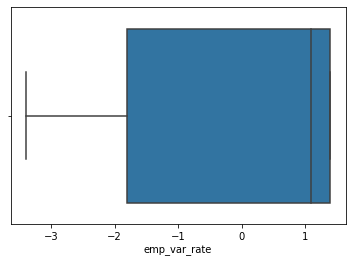

In [242]:
sns.boxplot(data1['emp_var_rate'])

# No outlier found for this feature

### Checking Outlier For The Feature "cons_price_idx"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cons_price_idx', ylabel='Density'>

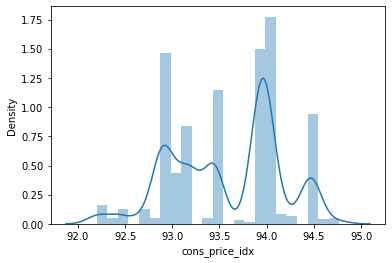

In [243]:
sns.distplot(data1['cons_price_idx'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons_price_idx'>

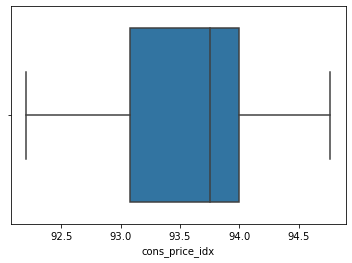

In [244]:
### Checking outlier for the feature "cons.price.idx"
sns.boxplot(data1['cons_price_idx'])

#No outlier found for this feature

### Checking Outlier For The Feature "cons_conf_idx"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cons_conf_idx', ylabel='Density'>

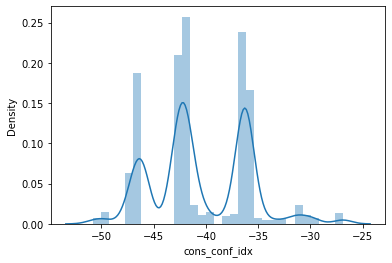

In [245]:
sns.distplot(data1['cons_conf_idx'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons_conf_idx'>

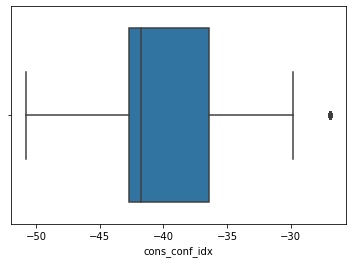

In [246]:
### Checking outlier for the feature "cons.conf.idx"
sns.boxplot(data1['cons_conf_idx'])

# outlier found for this feature. So,outlier treatment required

In [247]:
# removing outlier for feature "cons.conf.idx" using IQR 
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['cons_conf_idx'], interpolation = 'midpoint') 

IQR

6.300000000000004

In [248]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['cons_conf_idx'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['cons_conf_idx'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [249]:
min_limit

-52.150000000000006

In [250]:
#filtering the data
data1.loc[data1['cons_conf_idx']<min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [251]:
data1.loc[data1['cons_conf_idx']>max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
60,55.0,entrepreneur,married,professional.course,no,yes,yes,cellular,oct,mon,...,1,999,2,failure,-3.4,92.431,-26.9,0.739,5017.5,no
66,49.0,technician,divorced,university.degree,no,yes,yes,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,no
732,31.0,admin.,married,high.school,no,no,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
891,24.0,blue-collar,married,basic.9y,no,yes,no,cellular,oct,fri,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,no
1019,67.0,retired,married,university.degree,no,no,no,cellular,oct,thu,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,no
1123,38.0,housemaid,divorced,basic.4y,no,yes,no,telephone,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,no
1235,37.0,blue-collar,married,basic.6y,no,yes,no,cellular,oct,fri,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,no
1257,38.0,retired,married,basic.4y,no,yes,yes,cellular,oct,tue,...,1,6,1,success,-3.4,92.431,-26.9,0.728,5017.5,no
1357,33.0,admin.,single,high.school,no,yes,no,cellular,oct,mon,...,2,6,2,failure,-3.4,92.431,-26.9,0.731,5017.5,no
1468,38.0,retired,single,university.degree,no,yes,no,cellular,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [252]:
## imputing the outliers as the count is high
data1.loc[data1['cons_conf_idx'] > max_limit,'cons_conf_idx']=np.median(data1['cons_conf_idx'])

In [253]:
data1['cons_conf_idx'].describe()

count    4119.000000
mean      -40.654649
std         4.378644
min       -50.800000
25%       -42.700000
50%       -41.800000
75%       -36.400000
max       -29.800000
Name: cons_conf_idx, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons_conf_idx'>

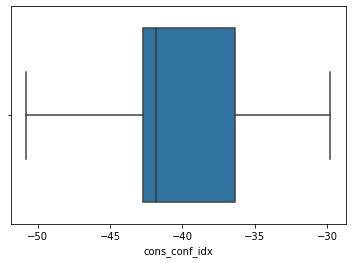

In [254]:
### Checking for outlier again for the feature "cons.conf.idx"
sns.boxplot(data1['cons_conf_idx'])

# outlier has been removed for the feature "cons.conf.idx"

### Checking Outlier For The Feature "euribor3m"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='euribor3m', ylabel='Density'>

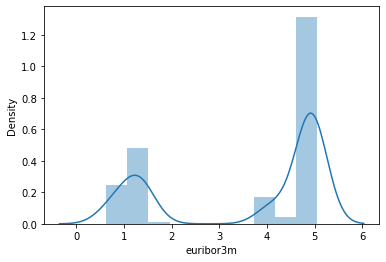

In [255]:
sns.distplot(data1.euribor3m)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='euribor3m'>

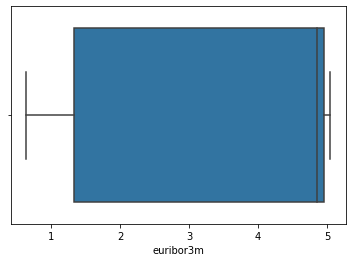

In [256]:
sns.boxplot(data1.euribor3m)

# Observation: No outlier present

### Checking Outlier For The Feature "nr.employed"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nr_employed', ylabel='Density'>

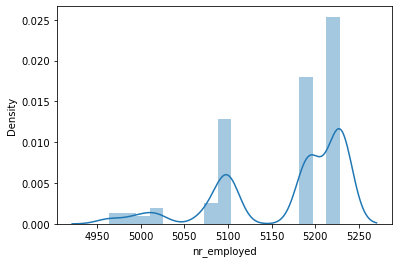

In [257]:
sns.distplot(data1['nr_employed'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr_employed'>

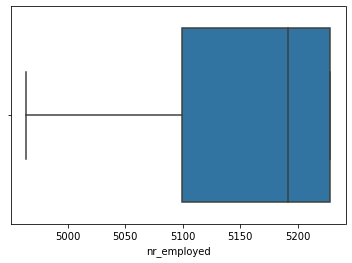

In [258]:
# Checking for outlier
sns.boxplot(data1['nr_employed'])

# Observation: No outlier present 

In [259]:
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

## Conversion Of Categorical Features To Numerical - Label Encoding

### For Feature "job"

In [260]:
#data1['job']

0       blue-collar
1          services
2          services
3          services
4            admin.
           ...     
4114         admin.
4115         admin.
4116        student
4117         admin.
4118     management
Name: job, Length: 4119, dtype: object

In [261]:
#data1_org = data1

In [262]:
## Conversion of categorical data to numeric equivalent for the feature "job" - Manual encoding 
#data1.job = data1.job.map({'blue-collar':1,'services':2,'admin.':3,'entrepreneur':4,'self-employed':5,'technician':6,'management':7,'student':8,'retired':9,'housemaid':10,'unemployed':11}) 

In [263]:
#Checking for missing values
#data1['job'].isnull().sum()

0

In [264]:
#data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30.0,1,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,2,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,2,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,2,married,basic.9y,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,3,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30.0,3,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39.0,3,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27.0,8,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58.0,3,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### For Feature "marital"

In [ ]:
# data1.marital.unique()

In [265]:
#data1.marital=data1.marital.map({'married':1,'single':2,'divorced':3})

In [133]:

## Converting the datatypes of categorical feature 'education'
## Converting the datatypes of categorical feature 'merital'

#data1['marital'] = data1['marital'].astype('int64')

### For Feature "education"

In [134]:
#data1.loc[data['education']=='NaN']
#data1.loc[(data1.education.isnull()==True)]

In [135]:
#data1.education.unique()

In [136]:
#data1.education

In [267]:
## Conversion of categorical data to numeric equivalent for the feature "education"
#data1.education = data1.education.map({'basic.9y':1,'high.school':2,'university.degree':3, \
                                       'professional.course':4,'basic.6y':5,'basic.4y':6,'illiterate':7}) 

In [139]:
#data.education.unique()

In [140]:
#data1.loc[data['education']=='NaN']
#data1.loc[(data1.education.isnull()==True)]

In [141]:
#data1.loc[ (data1['education'].isnull()==True)]

In [142]:
## Converting the datatypes of categorical feature 'education'
#data1['education'] = data1['education'].astype('int64')

### For Feature "default"

In [143]:
#data1.default.unique()

In [269]:
## Conversion of categorical data to numeric equivalent for the feature ""default
#data1.default = data1.default.map({'no':0,'yes':1})

In [145]:
## Converting the datatypes of categorical feature 'default'
#data1['default'] = data1['default'].astype('int64')

### For Feature "housing"

In [146]:
#data1.housing.unique()

In [271]:
## Conversion of categorical data to numeric equivalent for the feature "hosuing"
#data1.housing = data1.housing.map({'no':0,'yes':1})

In [148]:
# Converting the datatypes of categorical feature 'housing'
#data1['housing'] = data1['housing'].astype('int64')

### for feature "loan"

In [149]:
#data1.loan.unique()

In [273]:
## Conversion of categorical data to numeric equivalent for the feature "loan"
#data1.loan = data1.loan.map({'no':0,'yes':1})

In [151]:
## Converting the datatypes of categorical feature 'loan'
#data1['loan'] = data1['loan'].astype('int64')

### For Feature "contact"

In [152]:
#data1.contact.unique()

In [274]:
## Conversion of categorical data to numeric equivalent for the feature "contact"
#data1.contact = data1.contact.map({'cellular':1,'telephone':2})

In [154]:
## Converting the datatypes of categorical feature 'contact'
#data1['contact'] = data1['contact'].astype('int64')

### For Feature "month"

In [155]:
#data1.month.unique()

In [275]:
## Conversion of categorical data to numeric equivalent for the feature "month"
#data1.month = data1.month.map({'mar':1,'apr':2,'may':3,'jun':4,'jul':5,'aug':6,'sep':7,'oct':8,'nov':9,'dec':10})

In [157]:
## Converting the datatypes of categorical feature 'month'
#data1['month'] = data1['month'].astype('int64')

### For Feature "day_of_week"

In [158]:
#data1['day_of_week'].unique()

In [276]:
## Conversion of categorical data to numeric equivalent for the feature "day_of_week"
#data1.day_of_week = data1.day_of_week.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5})

In [160]:
## Converting the datatypes of categorical feature 'day_of_week'
#data1['day_of_week'] = data1['day_of_week'].astype('int64')

### For Feature "poutcome"

In [161]:
#data1['poutcome'].unique()

In [277]:
## Conversion of categorical data to numeric equivalent for the feature "poutcome"
#data1.poutcome = data1.poutcome.map({'nonexistent':1,'failure':2,'success':3})

In [163]:
## Converting the datatypes of categorical feature 'poutcome'
#data1['poutcome'] = data1['poutcome'].astype('int64')

### Converting The Target Variable "y" To Numerical

In [164]:
#data1['y'].unique()

In [278]:
## Conversion of categorical data to numeric equivalent for the feature ""default
#data1.y = data1.y.map({'no':0,'yes':1})

In [166]:
## Converting the datatypes of categorical feature 'default'
#data1['y'] = data1['y'].astype('int64')

In [167]:
#data1.dtypes

## Conversion Of Categorical Features To Numerical - One Hot Encoding

In [280]:
data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30.0,1,1,1,0,1,0,1,3,5,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39.0,2,2,2,0,0,0,2,3,5,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25.0,2,1,2,0,1,0,2,4,3,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38.0,2,1,1,0,1,0,2,4,5,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47.0,3,1,3,0,1,0,1,9,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30.0,3,1,5,0,1,1,1,5,4,...,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39.0,3,1,2,0,1,0,2,5,5,...,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27.0,8,2,2,0,0,0,1,3,1,...,2,999,1,2,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58.0,3,1,2,0,0,0,1,6,5,...,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


In [281]:
# one-hot-encoding the catg data
one_hot_encoded = pd.get_dummies(data1, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                                                        'contact', 'month', 'day_of_week','poutcome', 'y'])

In [282]:
data1 = one_hot_encoded

In [283]:
data1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_1',
       'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9',
       'job_10', 'job_11', 'marital_1', 'marital_2', 'marital_3',
       'education_1', 'education_2', 'education_3', 'education_4',
       'education_5', 'education_6', 'education_7', 'default_0', 'default_1',
       'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_1', 'contact_2',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'poutcome_1', 'poutcome_2', 'poutcome_3', 'y_0', 'y_1'],
      dtype='object')

In [285]:
data1.shape

(4119, 59)

In [286]:
#reducing # of columns after one-hot-encoding
#data1 = data1.drop(['job_admin.','marital_divorced','education_basic.4y','default_no','housing_no','loan_no'
#           ,'contact_cellular','month_apr','day_of_week_fri','poutcome_failure','y_no'], axis=1)

data1 = data1.drop(['job_1','marital_1', 'education_1', 'default_0', 'housing_0','loan_0', 'contact_1', \
                    'month_1','day_of_week_1','poutcome_1','y_0'], axis=1)

 

In [287]:
data1.shape

(4119, 48)

<AxesSubplot:>

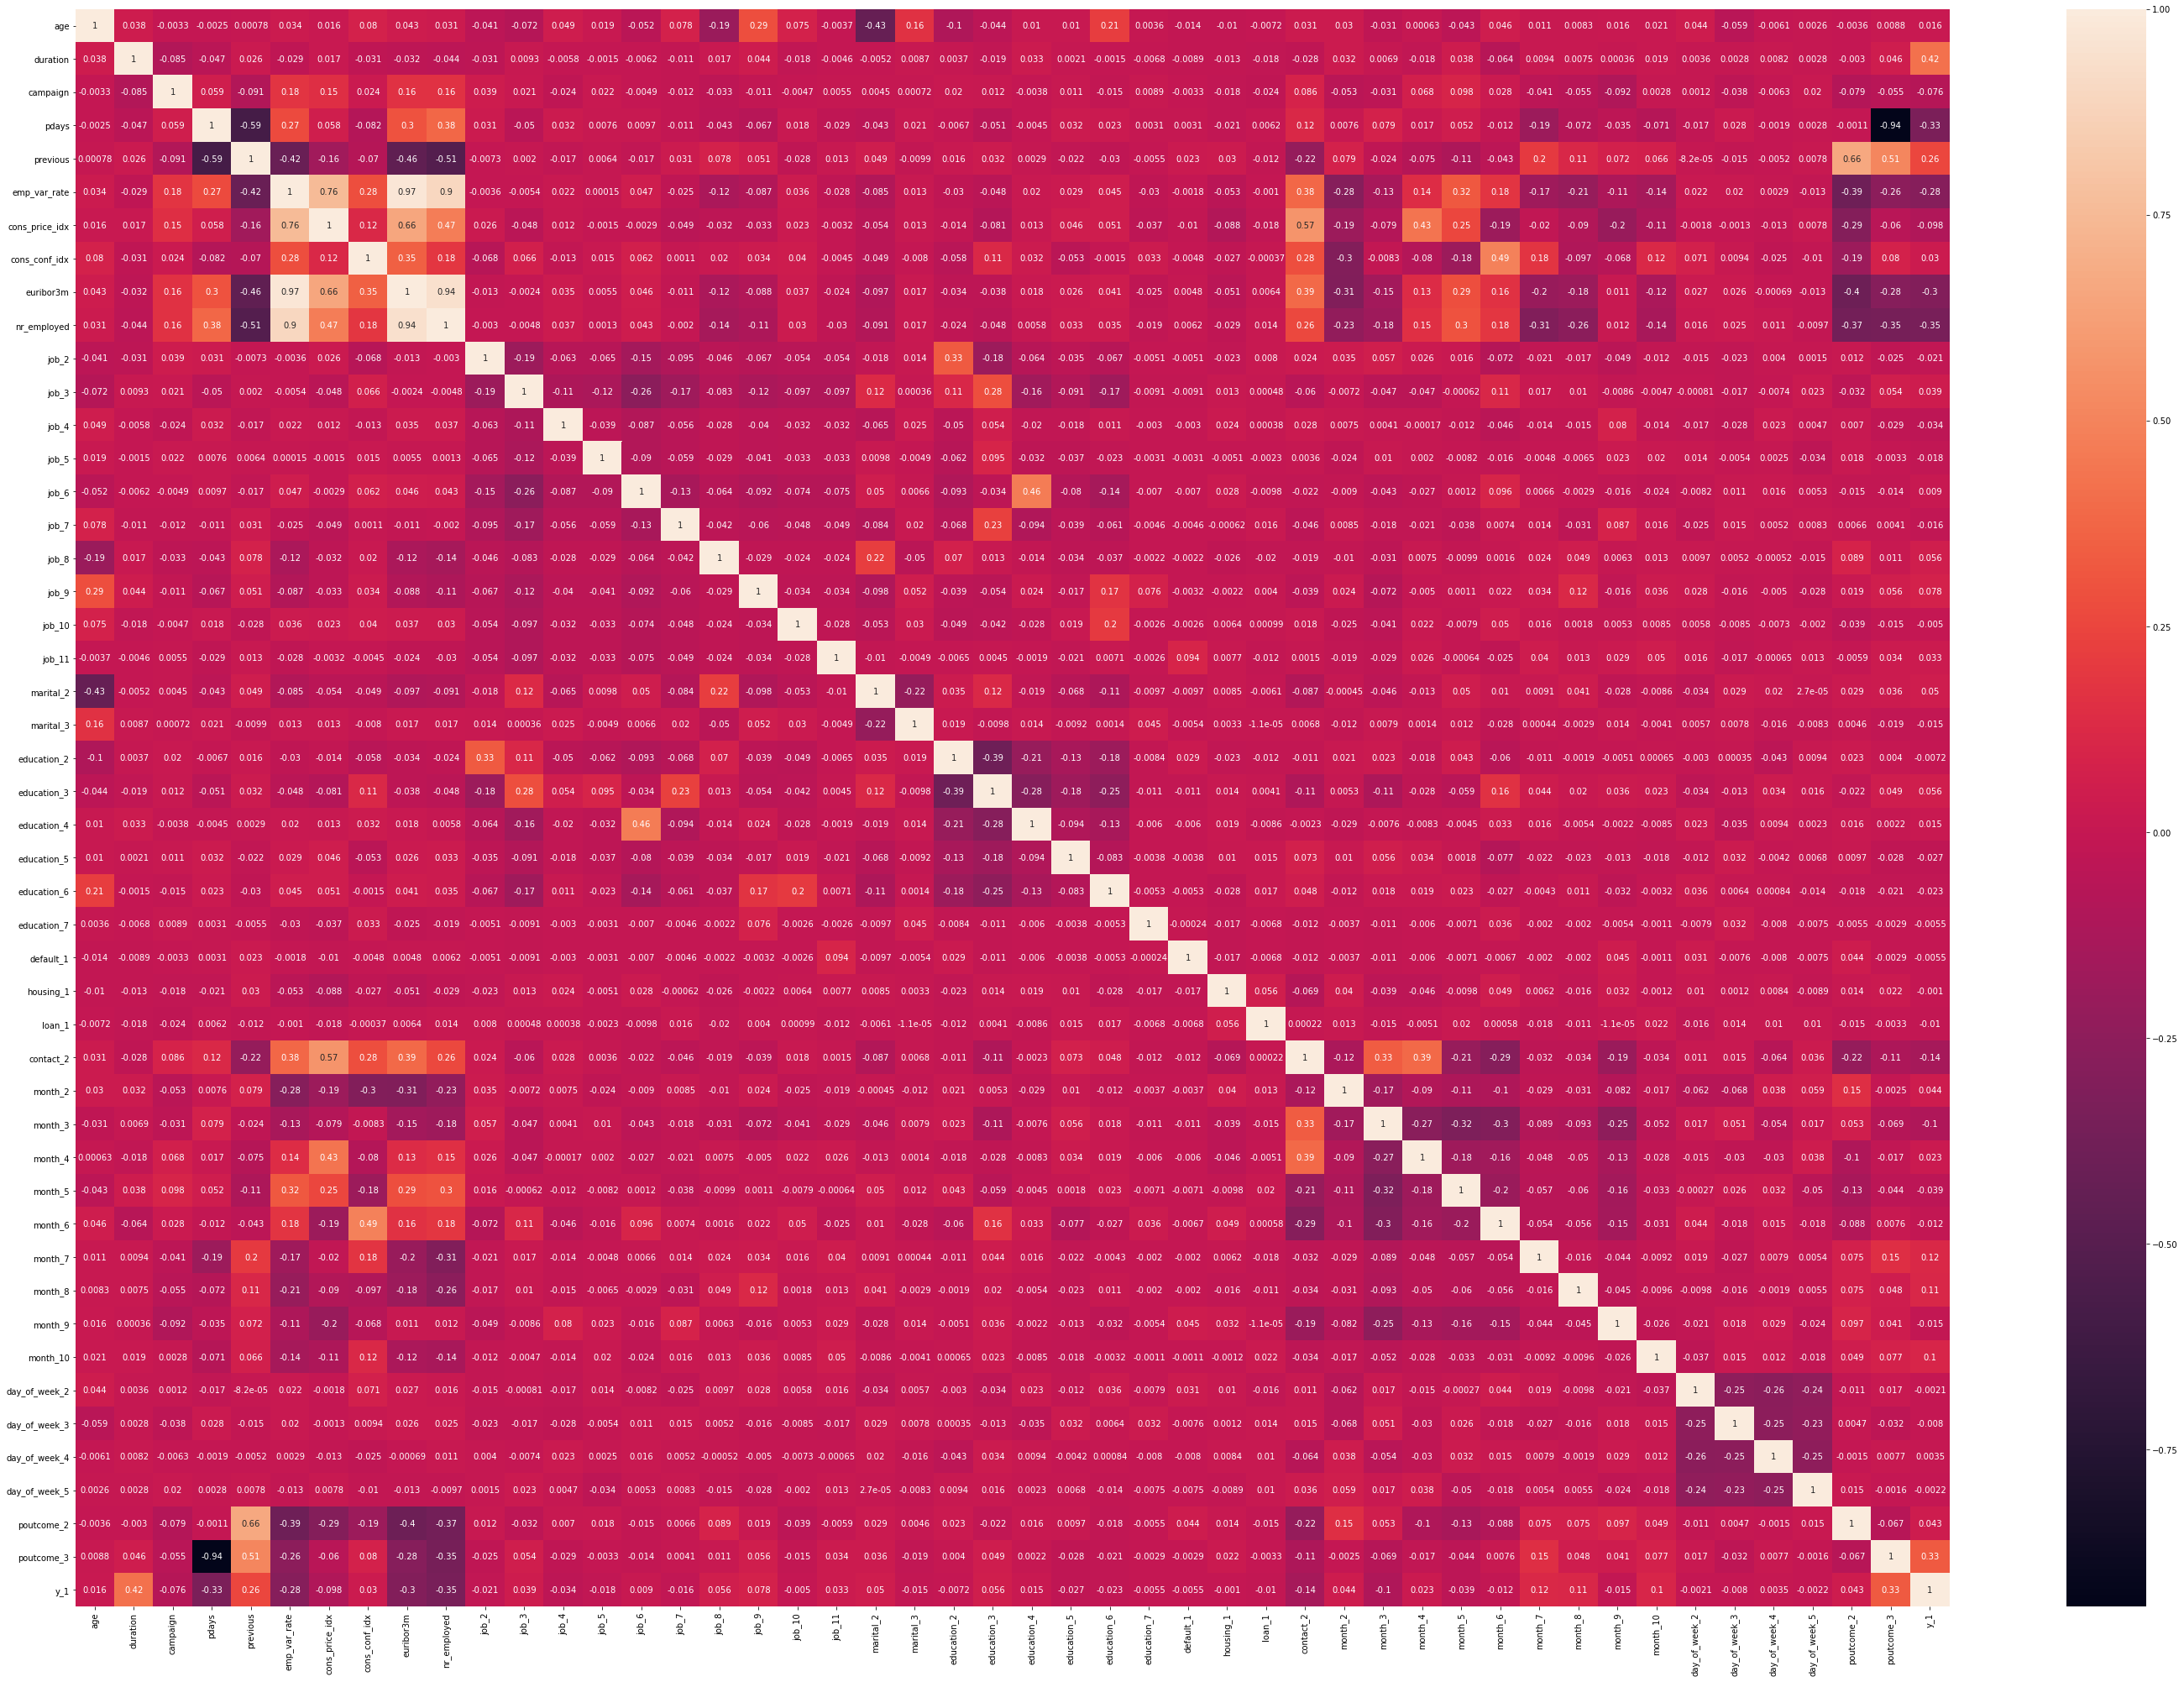

In [291]:
plt.figure(figsize=(50,35))
sns.heatmap(data1.corr(),annot=True)
## NO correlated features are present

In [146]:
# Observation: shows high corelation between emp var reate and euribor3

# Model Creation

### Methods We Use In This Project

In [292]:
## visualizing the roc plot
def plot_roc_curve(mfpr, mtpr):
    plt.plot(mfpr, mtpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [293]:
import pickle
def savepkl_roc(filename,fpr,tpr,thresholds, auc):
    mpklname = filename + ".pkl"
    lLst = list([fpr,tpr,thresholds,auc])
    file_pkl = open(mpklname, 'wb')
    pickle.dump(lLst, file_pkl) 
    file_pkl.close() 

In [294]:
def readpkl_roc(filename):
    filename= filename + '_roc.pkl'
    file_pkl = open(filename, 'rb')
    lLst = []
    lLst = pickle.load(file_pkl) # dump information to that file
    file_pkl.close() # close the file
    return lLst

In [295]:
def save_into_pkl(filename, res_data):
    file_pkl = open(filename + '.pkl', 'wb') 
    pickle.dump(res_data, file_pkl) 
    file_pkl.close() 

In [296]:

data1

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_8,month_9,month_10,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,poutcome_2,poutcome_3,y_1
0,30.0,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,0,0,0,0,1,0,0,0
1,39.0,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,0,0,0,1,0,0,0
2,25.0,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,1,0,0,0,0,0
3,38.0,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,1,0,0,0
4,47.0,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30.0,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,0,1,0,0,0,0
4115,39.0,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,0,0,0,0,1,0,0,0
4116,27.0,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,0,0,0,0,1,0,0
4117,58.0,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,0,0,0,0,1,0,0,0


In [297]:
data1.shape

(4119, 48)

In [298]:

# Since we know and also seen how duration dynamically correlates t/w output (y), we are removing this feature from dataset
# also we learnt that emp_var_rate and euribor3m also has correlation each other, we reduce euribor3m feature even.
data1 = data1.drop(columns=['duration','euribor3m'], axis=1)

In [303]:
#uncomment this , if Label encoding is cancelled for catg vabs.*************
#data1.rename(columns={'y_yes':'y'},inplace=True) 

data1.rename(columns={'y_1':'y'},inplace=True) 

In [300]:
## Checking if the model performance increases if we delete the feature "pdays" which we find in the bivariate analysis 
# that there is a bit of correlation...
data1 = data1.drop('pdays',axis = 1)

In [305]:
# check after dropping of first columns after one-hot-endcoding
# duration, eurobor3m for their correlation 
# pdays 

data1.shape

(4119, 45)

In [306]:
data1.groupby('y').size()

#since it is imbalanced data, 
# mostly we need to do subsample the data, over sample or create synthetic data

y
0    3668
1     451
dtype: int64

### Read Pickle

In [307]:
# Save the data (ie. data1) till now whatever preprocessed into a file pickle so that 
# we reduce executing pre-processing steps often.

# ******** Uncomment this only when needed (when you want to write to pickle then) again keep it commented ************
import pickle
#file_pkl = open('data1_LabelEncoded.pkl', 'wb') # open a file
#pickle.dump(data1, file_pkl) # dump information to that file
#file_pkl.close() # close pickle (.pkl)  file
# **********************************************************************************************************************

In [159]:
# Open pickle file and read the data from it.
#file_pkl = open('data1.pkl', 'rb')
#data1 = pickle.load(file_pkl) # dump information to that file
#file_pkl.close() # close the file

In [ ]:
data1.shape()

In [308]:
## -----
# Defining X, y
X = data1.iloc[ :, 0:-1]
y = data1.y

In [309]:
res_lst = []


In [310]:
## scaling data
#standardscalar -- scales the data to a relatively normal distribution

#minmaxscaler -- this is the default if we need feature transformation - it does not distort data. \
#Outliers we have to manually taken care of.

from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scale=MinMaxScaler()
scale = StandardScaler()
X_scaled=scale.fit_transform(X)

In [311]:
## balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [312]:
#X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_smote, y_smote = smote.fit_resample(X,y)


In [313]:
## create train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote, y_smote, random_state=42)

In [314]:
#prevalence
#sum(X_train.y.values)/len(X_train.y.values)
#sum(X_test.y.values)/len(X_test.y.values)

## SVM

In [315]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)

SVC()

In [316]:
## henceforth all output from predict will be assigned to y_hat in all classifiers -for easy understanding of code.
y_hat=svclassifier.predict(X_test)

In [317]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
#acc=accuracy_score(y_test,y_hat)
#acc
#accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(svclassifier, X_scaled, y, scoring='accuracy', cv = 3)
#print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 90.04612770089827


In [318]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       922
           1       0.72      0.70      0.71       912

    accuracy                           0.71      1834
   macro avg       0.71      0.71      0.71      1834
weighted avg       0.71      0.71      0.71      1834



In [319]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.7097844112769486

In [320]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0. 0. 0.]
Cross validation Score: 0.0
Std : 0.0


In [321]:
# implmenting GridsearchCV
from sklearn.model_selection import GridSearchCV
  
# fixing parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
  
grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3,scoring='f1',cv=3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .................................C=0.1, gamma=1; total time=   2.6s
[CV 2/3] END .................................C=0.1, gamma=1; total time=   2.6s
[CV 3/3] END .................................C=0.1, gamma=1; total time=   2.4s
[CV 1/3] END ...............................C=0.1, gamma=0.1; total time=   2.2s
[CV 2/3] END ...............................C=0.1, gamma=0.1; total time=   2.3s
[CV 3/3] END ...............................C=0.1, gamma=0.1; total time=   2.1s
[CV 1/3] END ..............................C=0.1, gamma=0.01; total time=   1.2s
[CV 2/3] END ..............................C=0.1, gamma=0.01; total time=   1.2s
[CV 3/3] END ..............................C=0.1, gamma=0.01; total time=   1.2s
[CV 1/3] END .............................C=0.1, gamma=0.001; total time=   1.1s
[CV 2/3] END .............................C=0.1, gamma=0.001; total time=   1.1s
[CV 3/3] END .............................C=0.1,

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [322]:
# best parameter from GridSearchCV
print(grid.best_params_)

{'C': 100, 'gamma': 0.1}


In [323]:
# check best estimator 
print(grid.best_estimator_)

SVC(C=100, gamma=0.1, random_state=42)


In [325]:
# supplying above SVC & gamma values got from the GridSearchCV to the cclassifier (SVC)  
clf=SVC(C=100, gamma=0.1,random_state=42)

In [326]:
# fit the data with classifier
clf.fit(X_train,y_train)

SVC(C=100, gamma=0.1, random_state=42)

In [327]:
# prediction after GridSearch
y_hat=clf.predict(X_test)

In [328]:
#confusion metrix +
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[809, 113],
       [ 56, 856]], dtype=int64)

In [329]:
## calculating accuracy +
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9078516902944384

In [330]:
# Precison - among all the positive predictions, how many of them actually positive? +
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.8833849329205367

In [331]:
# Recall - from the total positive results , how many positives are correctly predicted by the model? +
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.9385964912280702

In [332]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.910154173312068

In [333]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       922
           1       0.88      0.94      0.91       912

    accuracy                           0.91      1834
   macro avg       0.91      0.91      0.91      1834
weighted avg       0.91      0.91      0.91      1834



In [334]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.91


In [335]:
scores_after = cross_val_score(clf,X_scaled,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.09183673 0.04807692 0.08294931]
Cross validation Score: 0.07428765550885366
Std : 0.0


In [336]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

In [337]:
# store results for future use
res_lst.append(['SVM',Precision,Recall, F1_Score, accuracy])
#savepkl_roc('svm_roc',fpr,tpr,thresholds,auc)

In [338]:
savepkl_roc('svm_roc',fpr,tpr,thresholds,auc)

In [339]:
#mylst = readpkl_roc('svm')

In [340]:
#plt.plot(mylst[0],mylst[1])

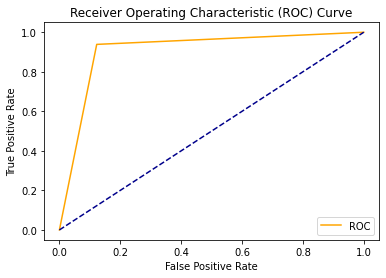

In [341]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr,tpr)

## Logistic Regression

In [194]:
## scaling data 
#from sklearn.preprocessing import StandardScaler 
#scalar = StandardScaler() ## objet creation
#X_scaled = scalar.fit_transform(X)

In [195]:
## creating training and testing data
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25,random_state = 355)

In [343]:
log_reg.max_iter

100

In [344]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=500)


log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [345]:
y_hat = log_reg.predict(X_test)

In [346]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[821, 101],
       [131, 781]], dtype=int64)

In [347]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8735005452562704

In [348]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.8854875283446711

In [349]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.856359649122807

In [350]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.8706800445930881

In [351]:

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

#import matplotlib.pyplot as plt
#import seaborn as sns

# Area Under Curve
auc = roc_auc_score(y_test, y_hat)
auc

0.8734075902880846

In [352]:
##cm
pd.crosstab(y_test, y_hat)

col_0,0,1
y,,
0,821,101
1,131,781


In [353]:
report=classification_report(y_test, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       922
           1       0.89      0.86      0.87       912

    accuracy                           0.87      1834
   macro avg       0.87      0.87      0.87      1834
weighted avg       0.87      0.87      0.87      1834



In [354]:
## Prediciting the probabilities of class 1
probs=log_reg.predict_proba(X_test)[:,1]

In [355]:
probs

array([0.08457478, 0.24046284, 0.55516804, ..., 0.97874659, 0.0877816 ,
       0.02073273])

In [356]:
## Defining the threshold limit
def predict_threshold (model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)

In [357]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(log_reg,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_hat))

Threshold : 0.0
[[821 101]
 [131 781]]
Threshold : 0.1
[[821 101]
 [131 781]]
Threshold : 0.2
[[821 101]
 [131 781]]
Threshold : 0.30000000000000004
[[821 101]
 [131 781]]
Threshold : 0.4
[[821 101]
 [131 781]]
Threshold : 0.5
[[821 101]
 [131 781]]
Threshold : 0.6000000000000001
[[821 101]
 [131 781]]
Threshold : 0.7000000000000001
[[821 101]
 [131 781]]
Threshold : 0.8
[[821 101]
 [131 781]]
Threshold : 0.9
[[821 101]
 [131 781]]


In [358]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.94


In [359]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

In [360]:
# store results for future use
res_lst.append(['LR',Precision,Recall, F1_Score, accuracy])
savepkl_roc('LR_roc',fpr,tpr,thresholds,auc)

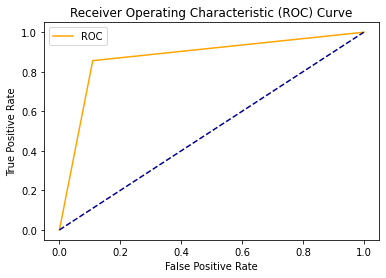

In [361]:
plot_roc_curve(fpr, tpr)

# k-NN Classifier

In [362]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler 
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [363]:
## scaling
#scalar = StandardScaler()
#X_scaled = scalar.fit_transform(X)

In [364]:
## train and test data
#X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [365]:
## taking optimal k (k = 10)
error_rate = []
# Will try
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

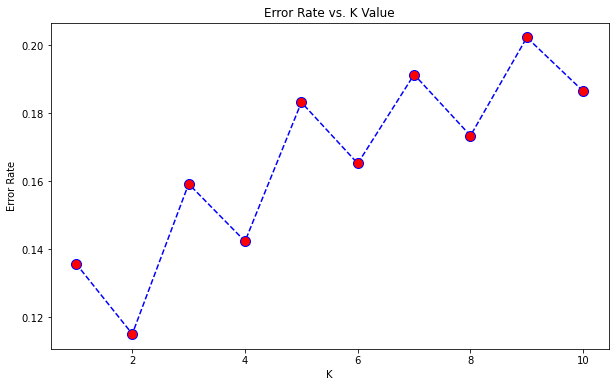

In [366]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [367]:
# fit the data into kNN model and check its performance

# n_neighbors = 2

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [368]:
# Prediction
y_hat = knn.predict(X_test)

In [369]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[769, 153],
       [ 58, 854]], dtype=int64)

In [370]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8849509269356598

In [371]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.8480635551142006

In [372]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.9364035087719298

In [373]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.8900468994267848

In [374]:
print("The accuracy score is : ", accuracy_score(y_test,y_hat))

The accuracy score is :  0.8849509269356598


In [375]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       922
           1       0.85      0.94      0.89       912

    accuracy                           0.88      1834
   macro avg       0.89      0.89      0.88      1834
weighted avg       0.89      0.88      0.88      1834



In [376]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.89


In [377]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

In [378]:
# store results for future use
res_lst.append(['kNN',Precision,Recall,F1_Score,accuracy])
savepkl_roc('knn_roc',fpr,tpr,thresholds,auc)

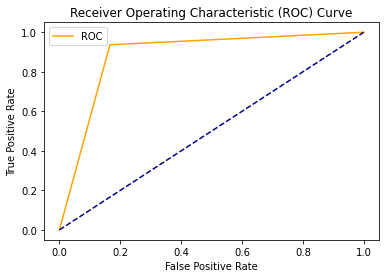

In [379]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

## Naive Bayes

In [238]:
## Creating training and testing
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6)

In [380]:
## Create instance of BernoulliNB
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.01) ## model object creation
nb.fit(X_train,y_train) ## fitting the model


BernoulliNB(alpha=0.01)

In [381]:
y_hat=nb.predict(X_test) ## getting the prediction

In [382]:
## model evalution
from sklearn.metrics import classification_report,confusion_matrix

In [383]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       922
           1       0.86      0.81      0.83       912

    accuracy                           0.84      1834
   macro avg       0.84      0.84      0.84      1834
weighted avg       0.84      0.84      0.84      1834



In [384]:
##
pd.crosstab(y_test,y_hat)

col_0,0,1
y,,
0,806,116
1,176,736


In [385]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix


array([[806, 116],
       [176, 736]], dtype=int64)

In [386]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8407851690294439

In [387]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision


0.863849765258216

In [388]:

# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.8070175438596491

In [389]:
#from sklearn.metrics import f1_score
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.834467120181406

In [390]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.84


In [391]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

In [392]:
# store results for future use
res_lst.append(['n Bays',Precision,Recall,F1_Score, accuracy])
savepkl_roc('nBays_roc',fpr,tpr,thresholds,auc)

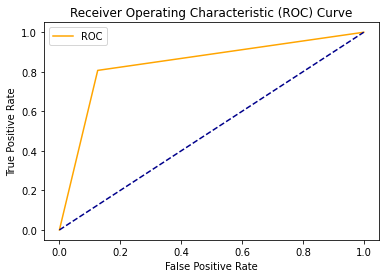

In [393]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

## Decision Tree

In [394]:
# Balace data
#from collections import Counter
#from imblearn.over_sampling import SMOTE
#sm=SMOTE()
#print(Counter(y))
#X_sm,y_sm=sm.fit_resample(X,y)
#print(Counter(y_sm))

In [395]:
# training and testing data
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [396]:
# fitting decisiontree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [397]:
y_hat=dt.predict(X_test)

In [398]:
#from sklearn.metrics import accuracy_score,classification_report,f1_score
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix


array([[770, 152],
       [ 87, 825]], dtype=int64)

In [399]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8696837513631407

In [400]:

# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.8444216990788127

In [401]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.9046052631578947

In [402]:
F1_Score=f1_score(y_test, y_hat)

In [403]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       922
           1       0.84      0.90      0.87       912

    accuracy                           0.87      1834
   macro avg       0.87      0.87      0.87      1834
weighted avg       0.87      0.87      0.87      1834



In [404]:
#pd.crosstab(y_test,y_hat)

In [405]:
from sklearn.model_selection import GridSearchCV

In [406]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [407]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [408]:
tree_cv.best_score_

0.8842595107821993

In [409]:
# replace with the above best parameters on the Decicison Tree Classifier

dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf=1,min_samples_split=2,splitter='best')

In [410]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19)

In [411]:
y_hat=dt_clf.predict(X_test)

In [412]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[800, 122],
       [ 89, 823]], dtype=int64)

In [413]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8849509269356598

In [414]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.870899470899471

In [415]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall


0.9024122807017544

In [416]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       922
           1       0.87      0.90      0.89       912

    accuracy                           0.88      1834
   macro avg       0.89      0.89      0.88      1834
weighted avg       0.89      0.88      0.88      1834



In [417]:
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.8863758750673129

In [418]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.89


In [419]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

In [420]:
# store results for future use
res_lst.append(['Decision Tree',Precision,Recall,F1_Score,accuracy])
savepkl_roc('dtree_roc',fpr,tpr,thresholds,auc)

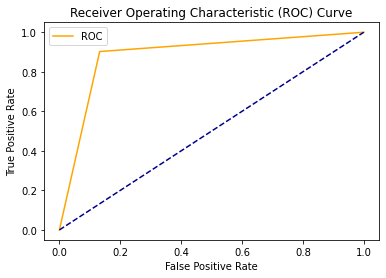

In [421]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

## Random Forest

In [422]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [423]:
y_hat=rf_clf.predict(X_test)

In [424]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       922
           1       0.92      0.92      0.92       912

    accuracy                           0.92      1834
   macro avg       0.92      0.92      0.92      1834
weighted avg       0.92      0.92      0.92      1834



In [425]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.918266593527153

In [426]:
## hyper params tuning
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [427]:
rf_clf1 = RandomForestClassifier(random_state=42)

In [428]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [429]:
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [430]:
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Best paramters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False})


In [431]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)

In [432]:
y_hat=rf_clf2.predict(X_test)

In [433]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix


array([[848,  74],
       [ 74, 838]], dtype=int64)

In [434]:

## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy


0.9193020719738277

In [435]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.918859649122807

In [436]:

# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall


0.918859649122807

In [437]:
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.918859649122807

In [438]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.92


In [439]:
#roc_curve params
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

In [440]:
# store results for future use
res_lst.append(['Random Forest',Precision,Recall,F1_Score, accuracy])
savepkl_roc('rf_roc',fpr,tpr,thresholds,auc)

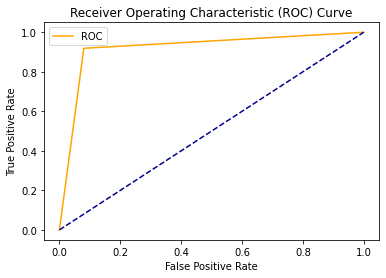

In [441]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)
#plt.plot(fpr, tpr) #,label="rForest, auc="+str(rForest_auc))

#plt.legend(loc=0)

## Gradient Boosting


In [442]:
## creating training and testing data
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)

In [459]:
## importing the model library
from sklearn.ensemble import  GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train) ## fitting the data
y_hat=gbm.predict(X_test)

In [461]:
#confusion metrix - not applicable , since they cant handle continous and binary output
#from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix


array([[833,  89],
       [115, 797]], dtype=int64)

In [462]:
## calculating accuracy- not applicable , since they cant handle continous and binary output
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8887677208287895

In [463]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.899548532731377

In [466]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.8739035087719298

In [467]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.8865406006674083

In [468]:
y_hat

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [469]:
len(X_train)

5502

In [470]:
len(X_test)

1834

In [489]:
## evaluatin the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_hat)
print(r2)

0.6924663203562051


In [481]:
X_test.shape

(1834, 44)

In [490]:
#adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r2_score = 1-(1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_score

0.6899866645188719

## XGBOOST

In [452]:
## Installing XGB library
!pip3 install xgboost

In [485]:
import xgboost 

In [486]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5502 entries, 6079 to 7270
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5502 non-null   float64
 1   campaign        5502 non-null   int64  
 2   previous        5502 non-null   int64  
 3   emp_var_rate    5502 non-null   float64
 4   cons_price_idx  5502 non-null   float64
 5   cons_conf_idx   5502 non-null   float64
 6   nr_employed     5502 non-null   float64
 7   job_2           5502 non-null   uint8  
 8   job_3           5502 non-null   uint8  
 9   job_4           5502 non-null   uint8  
 10  job_5           5502 non-null   uint8  
 11  job_6           5502 non-null   uint8  
 12  job_7           5502 non-null   uint8  
 13  job_8           5502 non-null   uint8  
 14  job_9           5502 non-null   uint8  
 15  job_10          5502 non-null   uint8  
 16  job_11          5502 non-null   uint8  
 17  marital_2       5502 non-null 

In [487]:
## model creation
from xgboost import XGBClassifier
xgb_c=XGBClassifier()
xgb_c.fit(X_train,y_train)
y_hat=xgb_c.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:56:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [493]:
#confusion metrix - not applicable , since they cant handle continous and binary output
#from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[861,  61],
       [ 80, 832]], dtype=int64)

In [494]:
## calculating accuracy- not applicable , since they cant handle continous and binary output
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9231188658669575

In [495]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.9316909294512878

In [496]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.9122807017543859

In [497]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.9218836565096953

In [498]:
r2_score(y_test,y_hat)

0.6924663203562051

In [499]:
adj_r2_score = 1-(1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_score

0.6899866645188719

In [500]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.92


In [312]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

In [501]:
# store results for future use
res_lst.append(['XG Boosting',Precision,Recall,F1_Score, accuracy])
res_df = pd.DataFrame(columns= ['clf_name','precision','recall','f1','acc'], data=res_lst)
save_into_pkl('res_data',res_df)
savepkl_roc('gbm_roc',fpr,tpr,thresholds,auc)

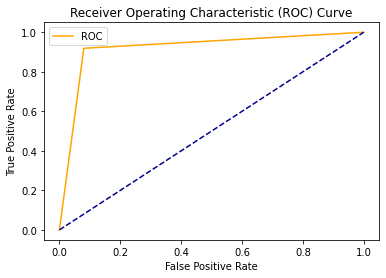

In [502]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

## Conclusion : 

In [503]:
res_df = pd.DataFrame(columns= ['clf_name','precision','recall','f1','acc'], data=res_lst)

In [504]:
res = res_df.loc[res_df['f1'] > 0]
res

,clf_name,precision,recall,f1,acc
0,SVM,0.883385,0.938596,0.910154,0.907852
1,LR,0.885488,0.856360,0.870680,0.873501
2,kNN,0.848064,0.936404,0.890047,0.884951
3,n Bays,0.863850,0.807018,0.834467,0.840785
4,Decision Tree,0.870899,0.902412,0.886376,0.884951
5,Random Forest,0.918860,0.918860,0.918860,0.919302
6,XG Boosting,0.931691,0.912281,0.921884,0.923119


In [505]:
res.sort_values(by='f1',ascending=False)

,clf_name,precision,recall,f1,acc
6,XG Boosting,0.931691,0.912281,0.921884,0.923119
5,Random Forest,0.918860,0.918860,0.918860,0.919302
0,SVM,0.883385,0.938596,0.910154,0.907852
2,kNN,0.848064,0.936404,0.890047,0.884951
4,Decision Tree,0.870899,0.902412,0.886376,0.884951
1,LR,0.885488,0.856360,0.870680,0.873501
3,n Bays,0.863850,0.807018,0.834467,0.840785


Observations:
    
    1. While seeing at the data : we found that there were no presence of NaN values in the dataset (bank-additional.csv -sample) 
        could see that there are unknown values. 
    2. We have filled default NaN values for treating these unknown values further. 
    3. The dataset contains 1149 rows and 21 columns (Numerical columns -   Categorical - 6 and binary y)
    4. Domain analysis : write something
    5. Univeriate analysis  - write
    6. Bivariate analysis 
    7. While these analysis, we found that euribor3m, pdays have correlation and hence these predictors also to be drropped from the dataset. As it is already mentioned in the problem document, we found that duration effecting the output by its more correlation to outcome, hence dropped at the first instance itself.    .
    8.Treating the outliers - there are outliers in the predictors such as age, previous, cons_conf_idx etc that we have treated it using IQR function.
    9. For converting of categorical predictors, we have used label encoding as well as one-hot-encoding and finally adopted only one-hot-encoding for the best results.---need to checked. 
    10. We have employed Standardscalar method of preprocesing library, for standardizing the predictors.
    11. SMOTE() for inflating the synthetic data as the dataset is imbalanced (counts y:1348, n:438)
    12. We have fit several model for classification problems : using SVM, Logistic-Regression, Decision-Trees, Naive-Bays,  Random-Forest, Gradient-Boosting algorithms.
       
    13. Out of the runs on various algorithms, we have achieved/found that Random-Forest model gives highest F1 score of 92% followed by SVM 91% F1-score which is the harmonic-mean of precision and recall and accuracy 92% and 91% respectively.
    
    
    
    

In [506]:
res['precision'].max()

0.9316909294512878

In [507]:
res['precision'].min()

0.8480635551142006

In [508]:
res['f1'].max()

0.9218836565096953

In [509]:
res['f1'].min()

0.834467120181406

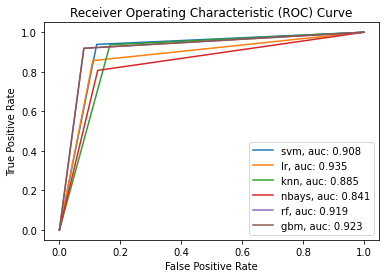

In [510]:
for i in ['svm','lr','knn','nbays','rf','gbm']:
    lst1 = readpkl_roc(i)
    plt.plot(lst1[0],lst1[1],label=i+", auc: "+str(round(lst1[3],3)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Conclusion: Out of the tests we have performed with different classifiers, we have got F1 scores for XG-Boost and Random-Forest 92% each and AUC scores-wise we have Logistic Regression 94% followed by XG-Boost 92%... (these results yielded by the models - after label encoding of categorical predicators and one-hot-encoding thereafter.)

# so we can go either for XG boost or Random forest or Logistic Regression models.

In [511]:
#Saving the Random-Forest to the future use
save_into_pkl('best_model_deposit_pred_rf',rf_clf2)
